# Daegu Apartment Data : Selling Price Predictive Analysis and Machine Learning

## Background

Daegu is South Korea's third-largest metropolis after Seoul and Busan. With a 2024 population estimated at 2,179,929 (worldpopulationreview.com), demand for housing is high. Limited residential land makes apartments the primary housing solution in Daegu, mirroring other densely populated cities. According to 2022 data, there are roughly 239,000 apartment buildings in Daegu (https://www.statista.com/statistics/1303257/south-korea-apartments-in-daegu-by-number-of-stories/#statisticsContainer).

Daegu's rapid development has fueled growing demand for apartment rentals. Property agents facilitate most apartment transactions, offering convenience and streamlining the buying and selling process for both parties.

Apartment pricing poses a challenge due to limited land resources and dense urban activity. Individual sellers often struggle to determine fair market values for their units. Setting prices too high hinders sales, while prices that are too low can sacrifice profits.

## Problem Statement

Accurately determining apartment prices aligned with the market poses a significant challenge for real estate agents, especially in Daegu, South Korea. Prices serve as a crucial factor for potential buyers – they critically compare offerings based on price, facilities, and quality.

With strong demand for apartments in Daegu, property agents face intense competition. Setting competitive rental prices that accurately reflect an apartment's features and amenities is vital for agents to retain customers and meet sales targets.

To address this challenge, a model capable of predicting competitive rental prices would streamline apartment pricing for agents. This would offer valuable support in a dynamic market landscape and ultimately facilitate more successful transactions

## Goal

This project aims to develop machine learning models capable of predicting competitive sale prices for rental. To achieve this, the models will  leverage characteristics such as apartment size, location, and amenities. These models are essential for  property agents to price rentals appropriately, maximizing satisfaction for prospective tenants while improving profitability. The accurate sales price model provides vital guidance for sellers or property developers, facilitating better-informed decisions regarding pricing strategies.

## Analytic Approach

The method entails examining statistics to find trends and connections between the characteristics of apartments and their selling prices. The fact that the outcome variable (Sales Price) is continuous suggests that the regression model is appropriate for this purpose. The selling price will be estimated by this model using attributes of the apartments as predictors.

## Evaluation Metrics

Various metrics, including Root Mean Square Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE), help evaluate model performance. These metrics quantify prediction accuracy, with lower values indicating better performance.

In the regression model there is a residual which is the difference between the predicted value and the actual value so that the residual is used to measure how close the predicted value is to reality. RMSE is the root of the mean square residual. MAE is the average of absolute errors and is a metric that is not sensitive to outliers. MAPE is the absolute average percentage error. The smaller the RMSE, MAE, and MAPE values, the better the model will be at predicting apartment prices.

Importantly, consider potential issues of overfitting and underfitting.  Overfitting happens when a model adapts too closely to the training data, hindering its ability to generalize to new data. Underfitting occurs when the model fails to capture sufficient patterns in the training data, leading to poor performance on both training and test sets. Striking a balance between these extremes is critical for model success.

For this evaluation, I've chosen the Mean Absolute Error (MAE) metric. MAE calculates the average absolute difference between predicted and actual values. A lower MAE signals superior model performance in predicting rental prices based on the given features.

## Limitations

1. **Regional Specificity**: The model is tailored to the Daegu real estate market and may not accurately translate to other regions due to local variations in pricing factors.
2. **Temporal Dependency**: The dataset reflects a specific timeframe. Therefore, the model may not fully account for potential market fluctuations and evolving trends over time.
3. **Subjective Factors**: The dataset might not encompass influential subjective factors such as a property's aesthetic appeal or the perceived desirability of its neighborhood.

## 1. DATA UNDERSTANDING

### 1.1. Import Packages

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1.2. Load the Data into Pandas Dataframe

*Dataset Source: https://drive.google.com/drive/folders/1fmkyfjrzuJNaH02sXhp5vUxqum9bH0Fx*

In [14]:
#Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


### 1.3. Data Information

In [8]:
print(f'The number of rows and columns in the df dataset are {df.shape}')
df.info()

The number of rows and columns in the df dataset are (4123, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: fl

There are some features:
1. `Hallway Type` : Types of Apartment
2. `TimeToSubway`: Time needed to the nearest subway station
3. `SubwayStation`: Name of the nearest subway station
4. `N_FacilitiesNearBy(ETC)`: The number of other facilities nearby apartment
5. `N_FacilitiesNearBy(PublicOffice)`: The number of public office facilities nearby apartment
6. `N_SchoolNearBy(University)`: The number of universities nearby apartment
7. `N_Parkinglot(Basement)`: The number of the parking spaces in basement
8. `YearBuilt`: Year of building the apartment.
9. `N_FacilitiesInApt` : Number of facilities in the apartment
10. `Size(sqft)` : The apartment size (in square feet)
11. `SalePrice` : The apartment price (Won)

## 2. DATA WRANGLING

### 2.1. Check data type, null value, and unique value

In [17]:
pd.DataFrame(
    {
    'Feature': df.columns.values,
    'Data_type': df.dtypes.values,
    'Null_value': df.isna().mean().values * 100,
    'N_unique': df.nunique().values,
    'Sample_unique': [df[col].unique() for col in df.columns]
    }
)

,Feature,Data_type,Null_value,N_unique,Sample_unique
0,HallwayType,object,0.0,3,"[terraced, mixed, corridor]"
1,TimeToSubway,object,0.0,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,SubwayStation,object,0.0,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),int64,0.0,4,"[0, 1, 5, 2]"
4,N_FacilitiesNearBy(PublicOffice),int64,0.0,8,"[3, 5, 7, 1, 4, 2, 6, 0]"
5,N_SchoolNearBy(University),int64,0.0,6,"[2, 1, 3, 4, 5, 0]"
6,N_Parkinglot(Basement),int64,0.0,20,"[1270, 0, 56, 798, 536, 605, 203, 108, 1174, 9..."
7,YearBuilt,int64,0.0,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,int64,0.0,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),int64,0.0,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


The following information is discovered after examining each variable's data type, null value, and unique value:

1. The df contains 11 columns and none of which have null values.
2. Three columns contain object data, four contain float64 data, and four contain int64 data.
3. The df contains a combination of unique values and may have duplicated values(will check after this).
4. Many categories on Time To Subway features are not in the correct format. `[0-5min, 10min~15min, 15min~20min, 5min~10min]`
5. The 0 values means on that apartment there is no any facilities nearby.

In [18]:
# Changing Data Type from Float to Integer
df['N_FacilitiesNearBy(ETC)'] = df['N_FacilitiesNearBy(ETC)'].astype('int64')
df['N_FacilitiesNearBy(PublicOffice)'] = df['N_FacilitiesNearBy(PublicOffice)'].astype('int64')
df['N_SchoolNearBy(University)'] = df['N_SchoolNearBy(University)'].astype('int64')
df['N_Parkinglot(Basement)'] = df['N_Parkinglot(Basement)'].astype('int64')

In [19]:
# Check TimeToSubway Features
df['TimeToSubway'].value_counts


<bound method IndexOpsMixin.value_counts of 0            0-5min
1       10min~15min
2       15min~20min
3        5min~10min
4            0-5min
           ...     
4118         0-5min
4119    15min~20min
4120    15min~20min
4121     5min~10min
4122         0-5min
Name: TimeToSubway, Length: 4123, dtype: object>

There are various writing formats in the TimeToSubway column. We swap the "~" symbol for a "-" in order to be more organised and utilise the correct hyphens.

In [20]:
# Change format in the TimeToSubway
df.loc[df['TimeToSubway'] == '5min~10min', 'TimeToSubway']='5min-10min'
df.loc[df['TimeToSubway'] == '10min~15min', 'TimeToSubway']='10min-15min'
df.loc[df['TimeToSubway'] == '15min~20min', 'TimeToSubway']='15min-20min'

In [21]:
# Re-Checking TimeToSubway Features

df['TimeToSubway'].value_counts()

TimeToSubway
0-5min                1953
5min-10min             787
15min-20min            629
10min-15min            583
no_bus_stop_nearby     171
Name: count, dtype: int64

In [22]:
print('The number of duplicate data in this dataset are:')
df.duplicated().sum()

The number of duplicate data in this dataset are:


1422

In [23]:
df.loc[df.duplicated(), :]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0,0,0,203,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0,2,2,524,2007,4,1394,256637
133,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min-10min,Daegu,0,3,2,400,2015,7,644,300884
4114,corridor,10min-15min,Myung-duk,5,7,5,0,1992,3,355,86725
4115,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141
4120,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141


In [24]:
print('Percentage of Duplicated Data:',df.duplicated().sum()/df.shape[0]*100)

Percentage of Duplicated Data: 34.48944943002668


Because there is no unique column that can be identified, data that has the same value in each column can be called duplicate data. There are `1422 duplicated data` in the dataset and the percentage of duplicate data reaches 34.49%. Duplicate data in machine learning datasets can cause bias in the model, causing overfitting because the same data points can be calculated several times. Therefore we will drop all duplicate data.

In [25]:
# Drop duplicate data
df.drop_duplicates(inplace=True)

In [26]:
print('Number of Duplicated Data:',df.duplicated().sum())
df.shape

Number of Duplicated Data: 0


(2701, 11)

### 2.2. Show Descriptive Statistics Data

In [27]:
# Show dataframe Descriptive Statistics
display(df.describe(), df.describe(include='object'))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


,HallwayType,TimeToSubway,SubwayStation
count,2701,2701,2701
unique,3,5,8
top,terraced,0-5min,Myung-duk
freq,1667,1248,709


## 3. DATA ANALYSIS

## 3.1. Data Distribution

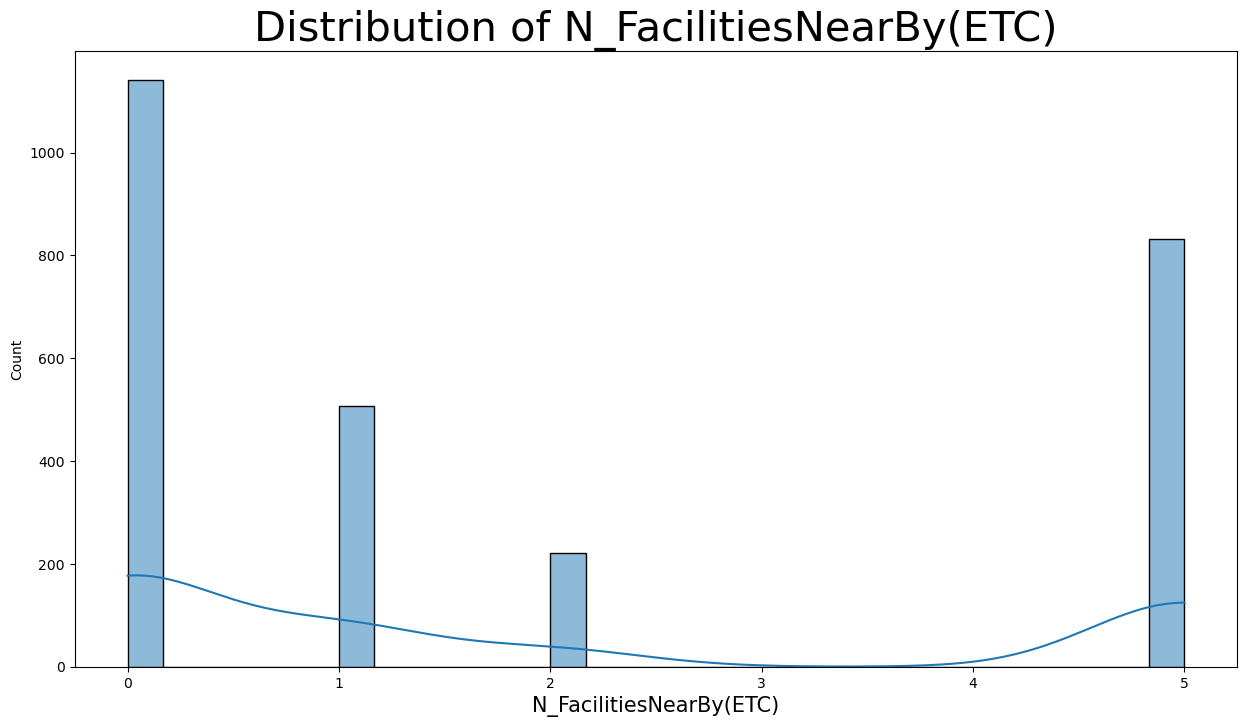

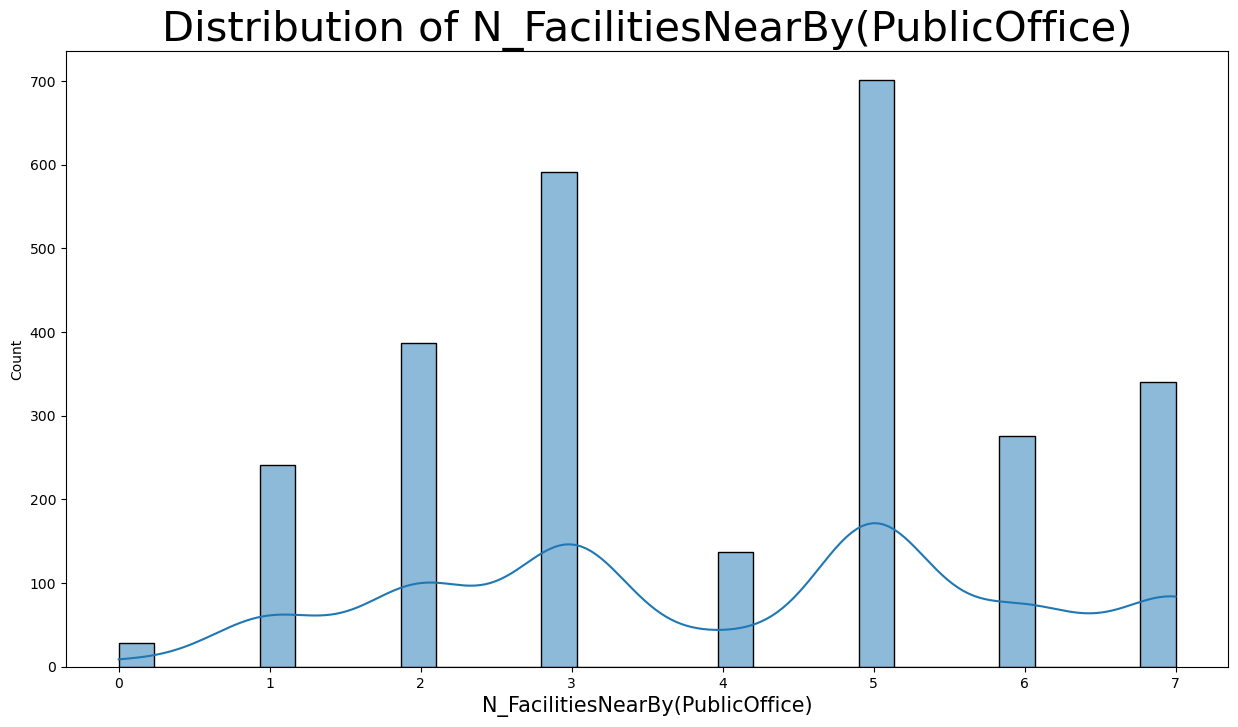

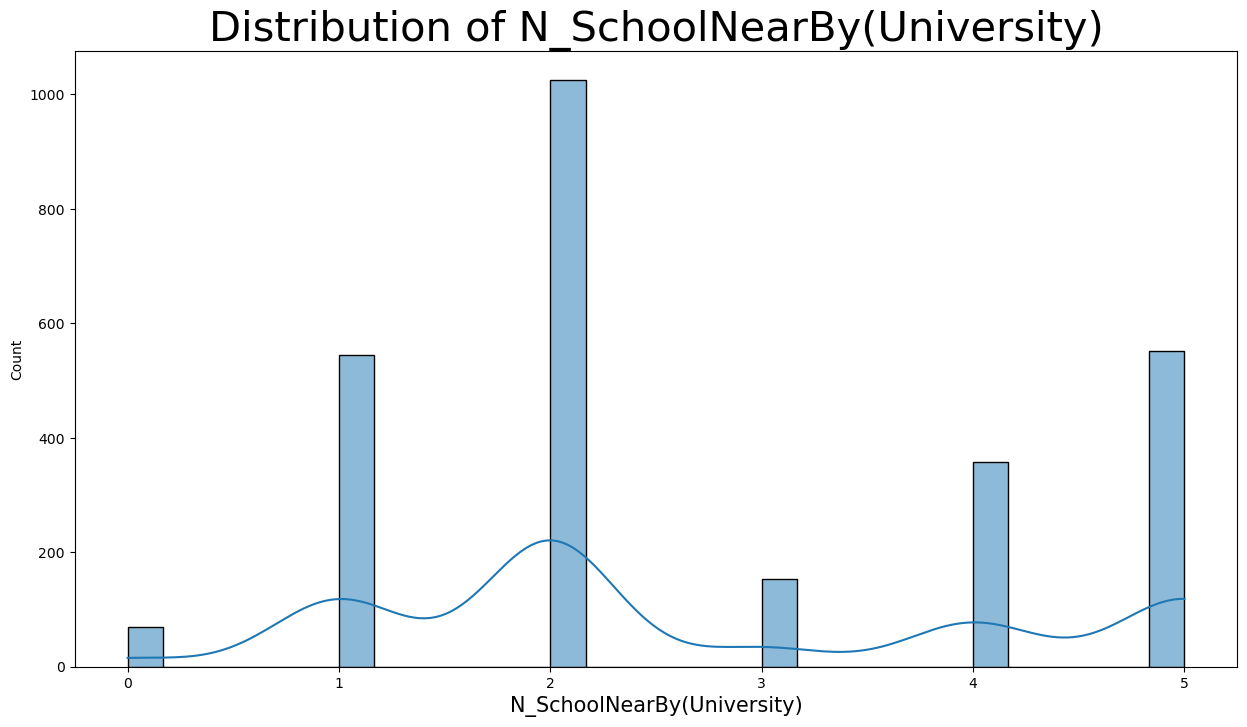

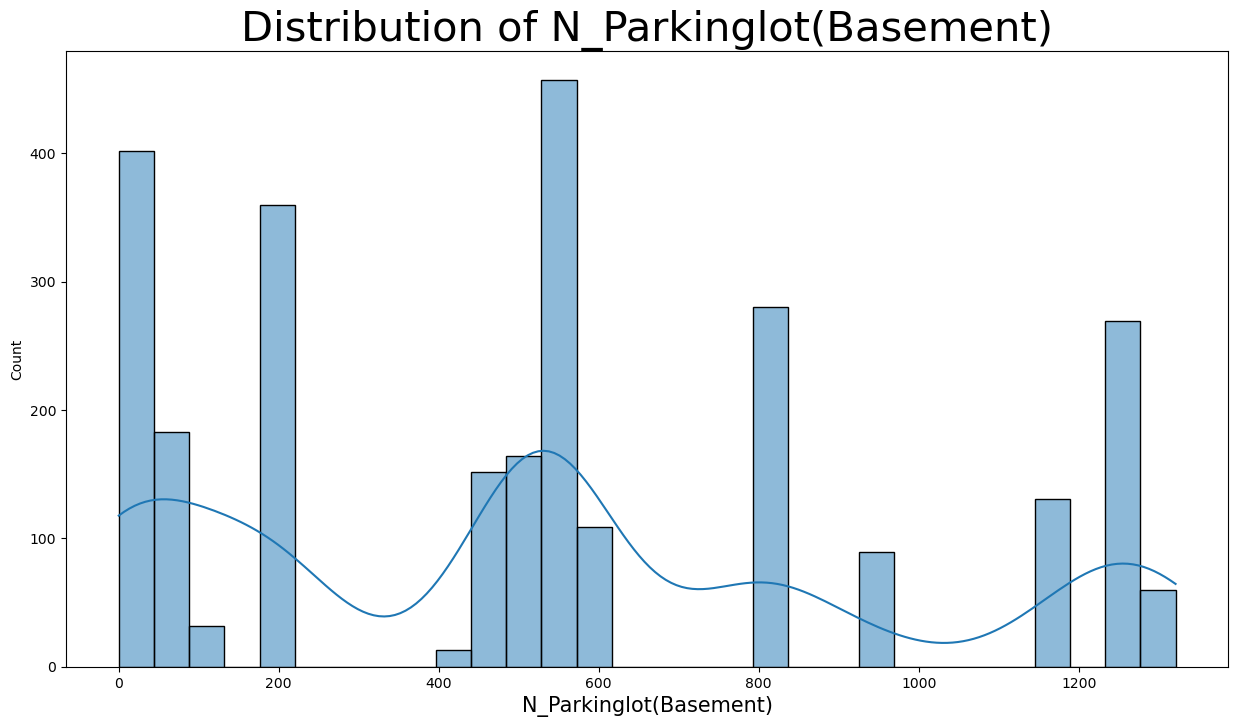

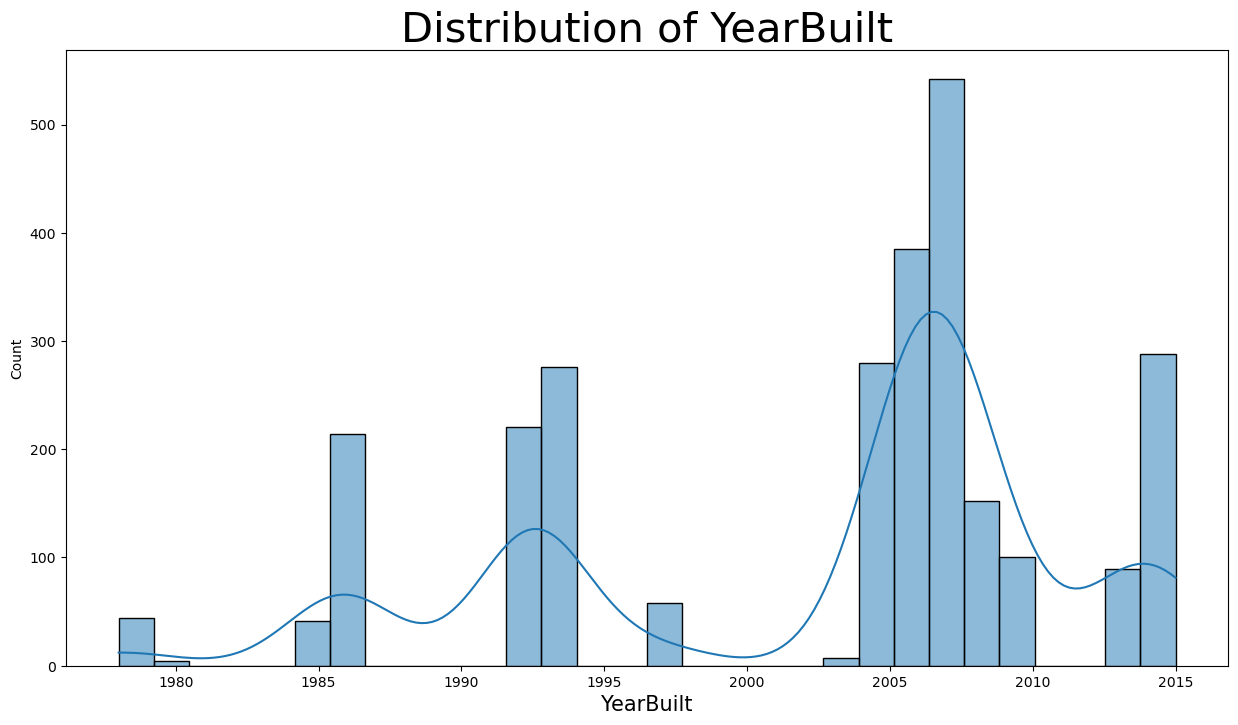

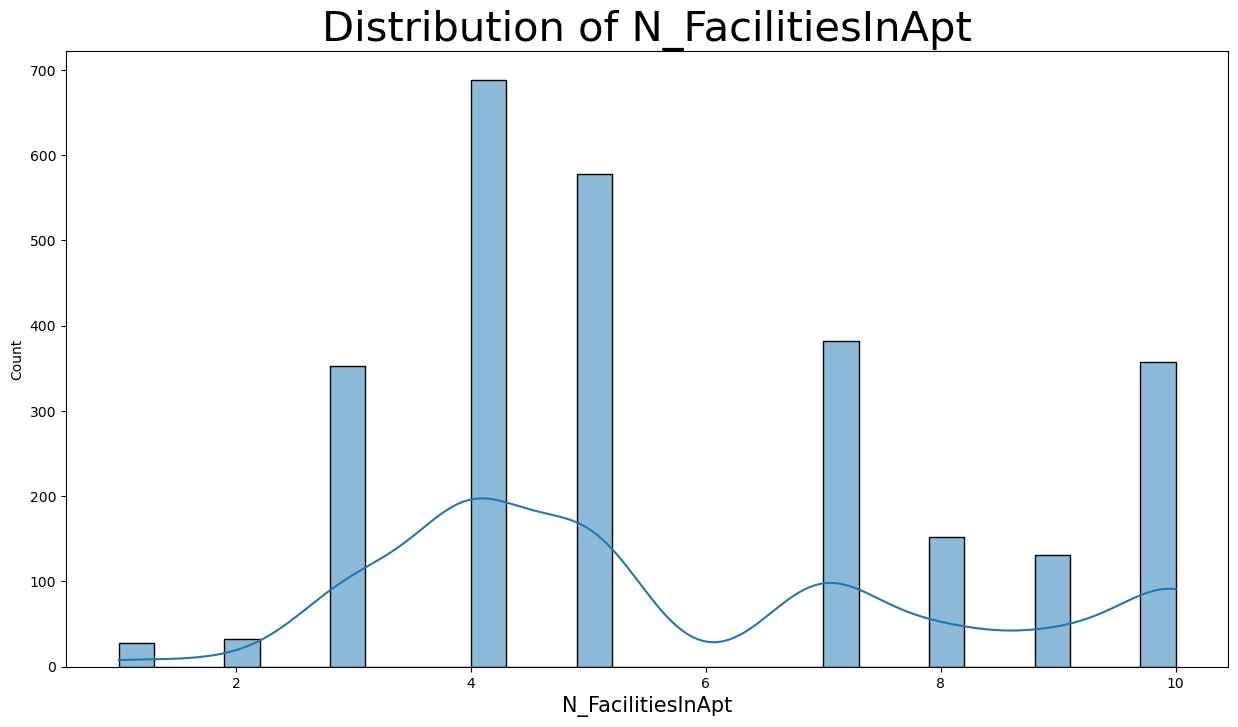

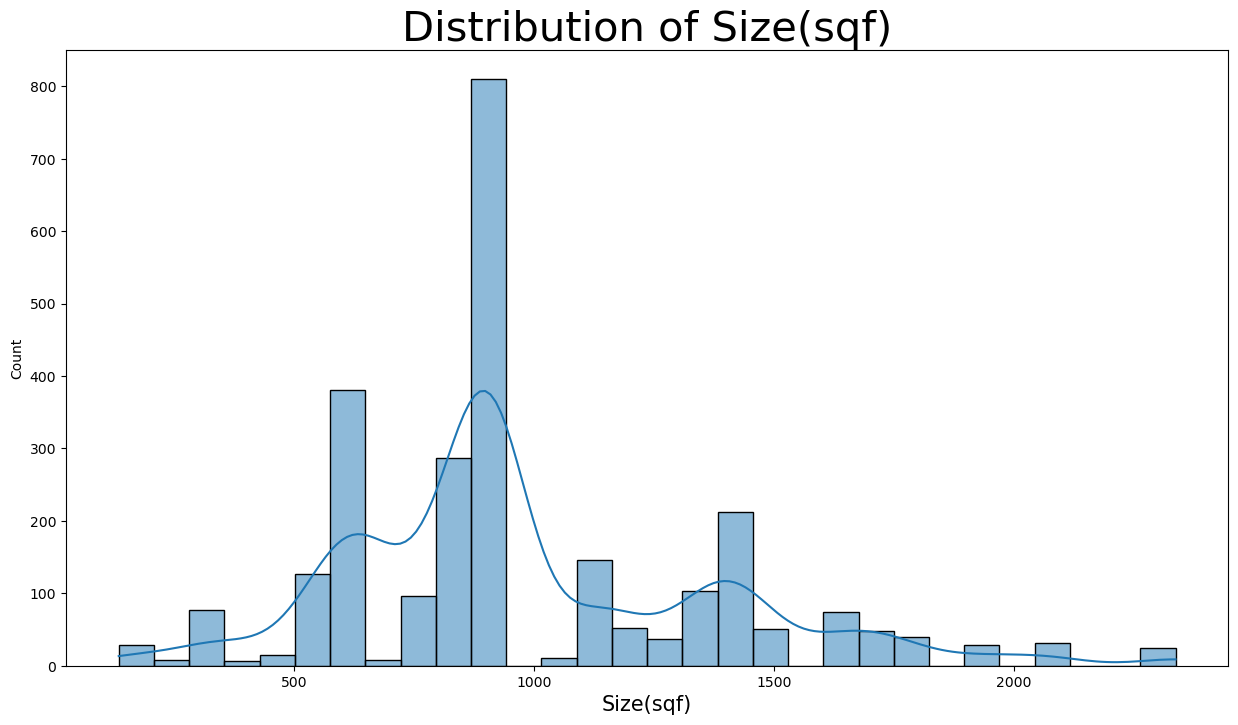

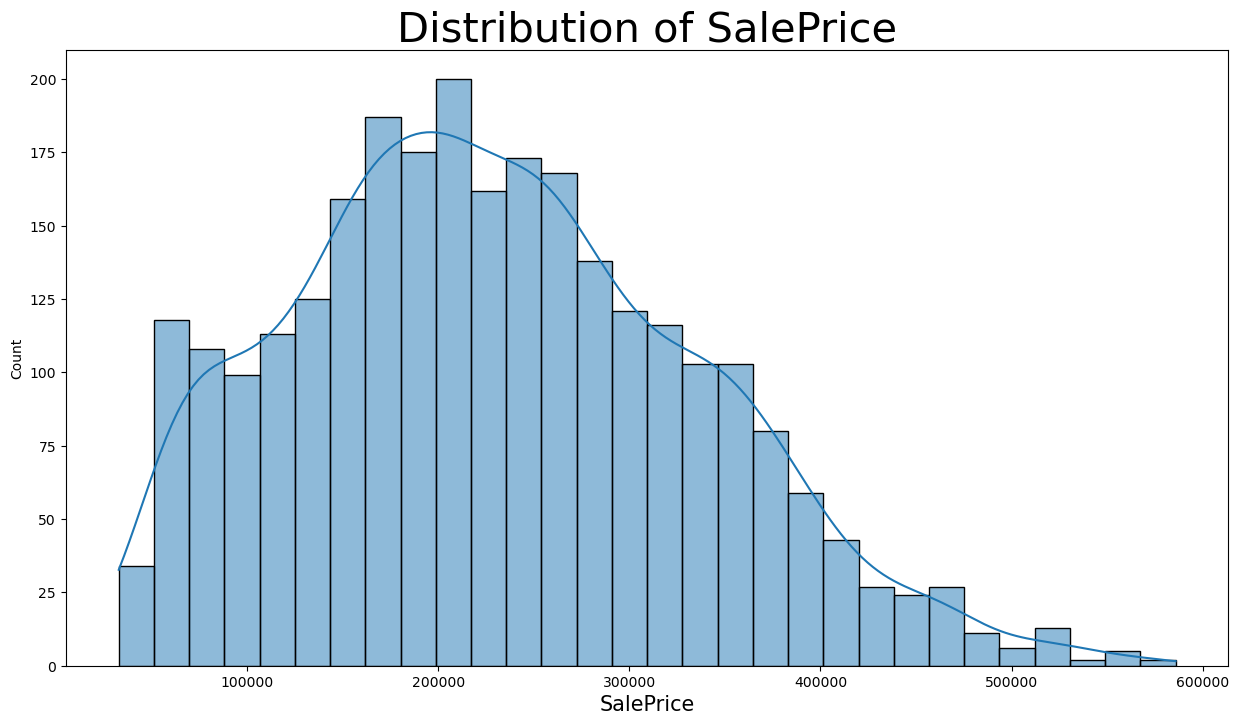

In [28]:
# list of columns to loop through
columns = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 
           'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 
           'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']
# loop through columns and create histogram
for col in columns:
    plt.figure(figsize=(15, 8))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}', size=30)
    plt.xlabel(col, size=15)
    plt.show()

The data distribution above provides us with the following insights:

1. `N_FacilitiesNearBy(ETC)`: This data indicates that while a small percentage of properties have up to five more facilities nearby, the bulk of properties have few or none at all.
2. `N_FacilitiesNearBy(PublicOffice)` : A property's proximity to public office facilities varies more than expected, with peaks occurring at properties with 3 and 5 facilities close by.
3. `N_SchoolNearBy(University)` : The majority of properties are close to one or more universities, suggesting the student target market may find them appealing.
4. `N_Parkinglot(Basement)`: Certain properties offering a huge number of parking spots, while the majority of properties have very few.
5. `YearBuilt`: There was a high amount of apartment' construction arround 2005 - 2013.
6. `N_FacilitiesInApt`: While some apartment appear to offer more facilities, the majority of properties seem to have comparatively few.
7. `Size (sqf)`: The majority of properties are moderately sized, with only a small number being quite large. Properties tend to cluster around lower values.
8. `SalePrice` : The majority of properties are in the lower price range, with a small number of properties having extremely high sale prices. Additionally, it shows that there could be some outliers at the right end of the distribution that need to be looked at further. This SalePrice data distribution indicates that this data is not normally distributed.

### 3.2. Outlier Identification

Outlier is a data point that is significantly different from other data points in a dataset. Outliers can be caused by measurement or execution errors, or they can occur naturally through variability. Outliers can have a big impact on statistical analysis and machine learning because they can skew hypothesis tests. There are several methods for identifying outliers, including the interquartile range (IQR) method, which calculates the outlier data points as the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. Outliers can be removed from a dataset using the same process as removing a data item from a pandas data frame.
Outliers can also affect the results of A/B tests and other experiments, leading to incorrect conclusions. However, outliers can also contain valuable information, so it is important to investigate them and determine whether they should be removed or kept in the dataset. There are several methods for detecting and handling outliers, including the interquartile range (IQR) method and winsorizing techniques.

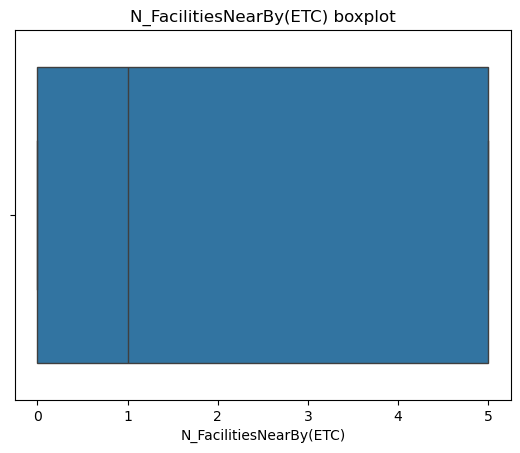

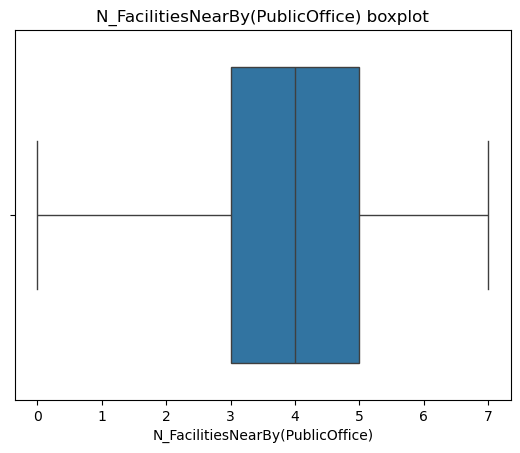

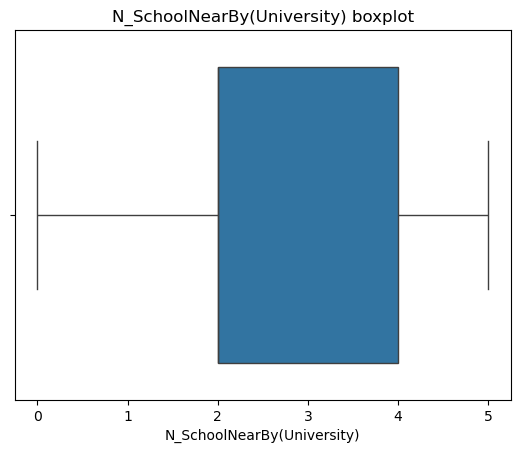

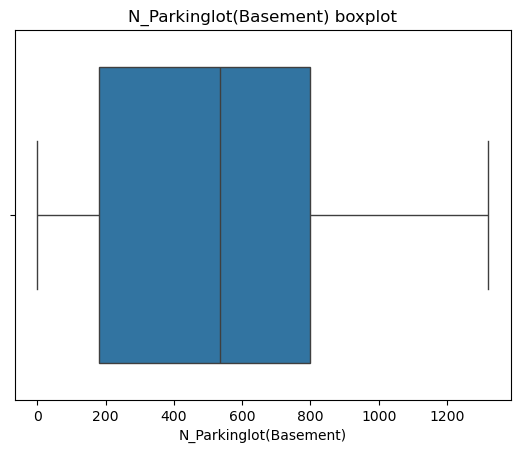

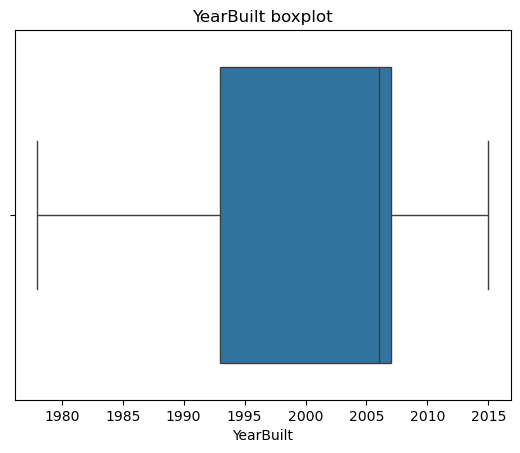

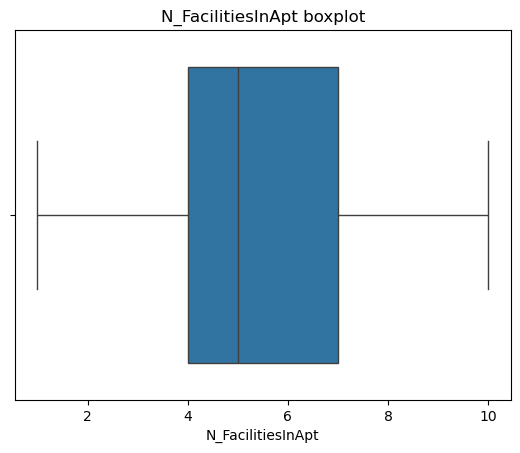

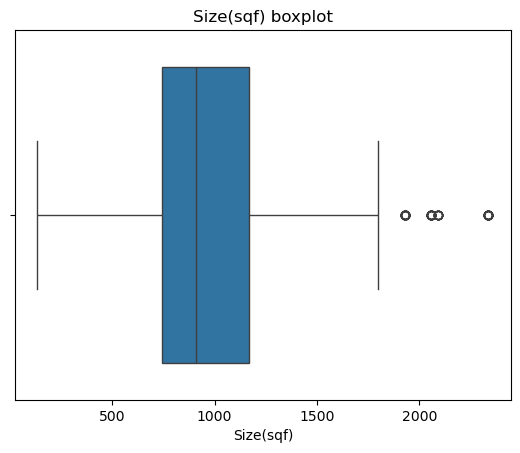

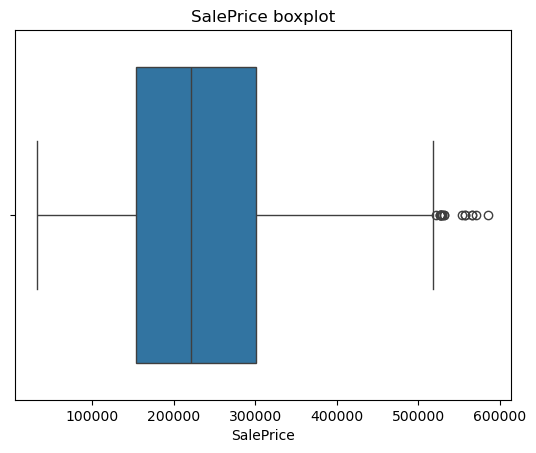

In [29]:
# Outliers Check for Numerical Values
columns = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 
           'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 
           'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']
for column in columns:
    sns.boxplot(df[column], orient='h')
    plt.title(f"{column} boxplot")
    plt.show()

A number of features, including `salePrice` and `Size(sqf)`, have an outlier in the boxplot findings. Processing will be done on each feature, resulting in data restrictions.

In [30]:
# Outlier Checking Function
def Outliers_check(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Upper_fence = Q3 + (1.5 * IQR)
    Lower_fence = Q1 - (1.5 * IQR)
    print(f'IQR: {IQR}')
    print(f'Lower Fence: {Lower_fence}')
    print(f'Upper Fence: {Upper_fence}')

##### Checking outlier on Size(sqf)

In [31]:
Outliers_check(df['Size(sqf)'])

IQR: 424.0
Lower Fence: 107.0
Upper Fence: 1803.0


In [32]:
df[df['Size(sqf)']>1906.5]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
106,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,2337,243362
134,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,2056,424778
207,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,348283
234,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,566371
288,terraced,10min-15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,2092,300884
...,...,...,...,...,...,...,...,...,...,...,...
3916,terraced,10min-15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,2092,407079
3949,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,556637
3977,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,383716
4027,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,2337,193805


##### Checking outlier on SalePrice

In [33]:
Outliers_check(df['SalePrice'])

IQR: 147345.0
Lower Fence: -67478.5
Upper Fence: 521901.5


In [34]:
df[df['SalePrice']>510747.0]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
204,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1643,566371
234,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,566371
549,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,553097
550,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,570796
656,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,528318
669,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,517699
971,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,529203
1180,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1643,530973
1295,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1519,526548
1877,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1643,515929


In [35]:
df[df['SalePrice']>510747.0].count()['SalePrice']

22

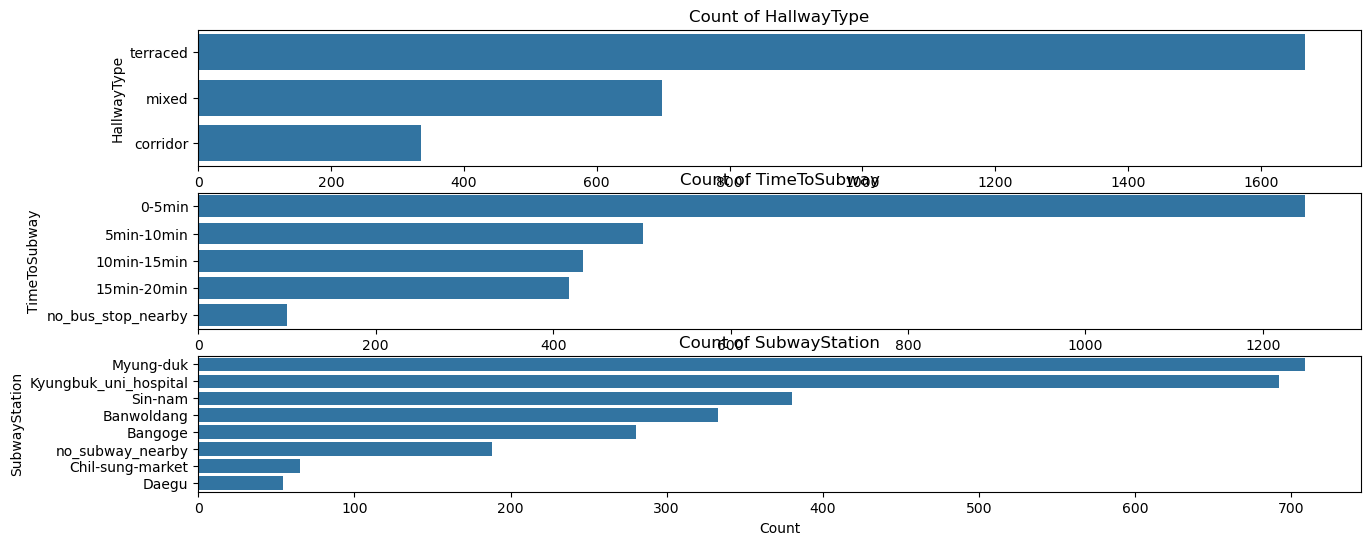

In [36]:
# Count Plots for Categorical Variables
categorical_var = ['HallwayType', 'TimeToSubway', 'SubwayStation']

plt.figure(figsize=(15, 2 * len(categorical_var)))

for i, column in enumerate(categorical_var, 1):
    plt.subplot(len(categorical_var), 1, i)
    sns.countplot(y=df[column], order = df[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.show()

Some conclusions that may be drawn from the supplied depiction of the categorical data distribution are as follows:

1. HallwayType: The most prevalent style of hallway is "terraced," which is followed by "mixed" and "corridor." These choices could be influenced by popular design styles or the coziness of a specific kind of hallway. A "terraced" hallway, for instance, can be desired for aesthetic or private reasons.
2. TimeToSubway: The majority of properties are "0-5min" walk from a Subway station, suggesting that choosing a property based on accessibility to public transportation is important. There are fewer properties with longer access times ("15min-20min" and "10min-15min"), which could lower their resale value.
3. Subway Station: "Myung-duk" is usually the closest to the property that is listed, with "Kyungbuk_uni_hospital" and "Sin-Nam" following closely behind. This implies that there may be a lot of new real estate development or that the area surrounding the station is a very sought-after place. On the other hand, stations like "Daegu" and "Chil-sung-market" are less often the closest to properties that are offered, which may suggest that there are less real estate alternatives or less demand in those locations.

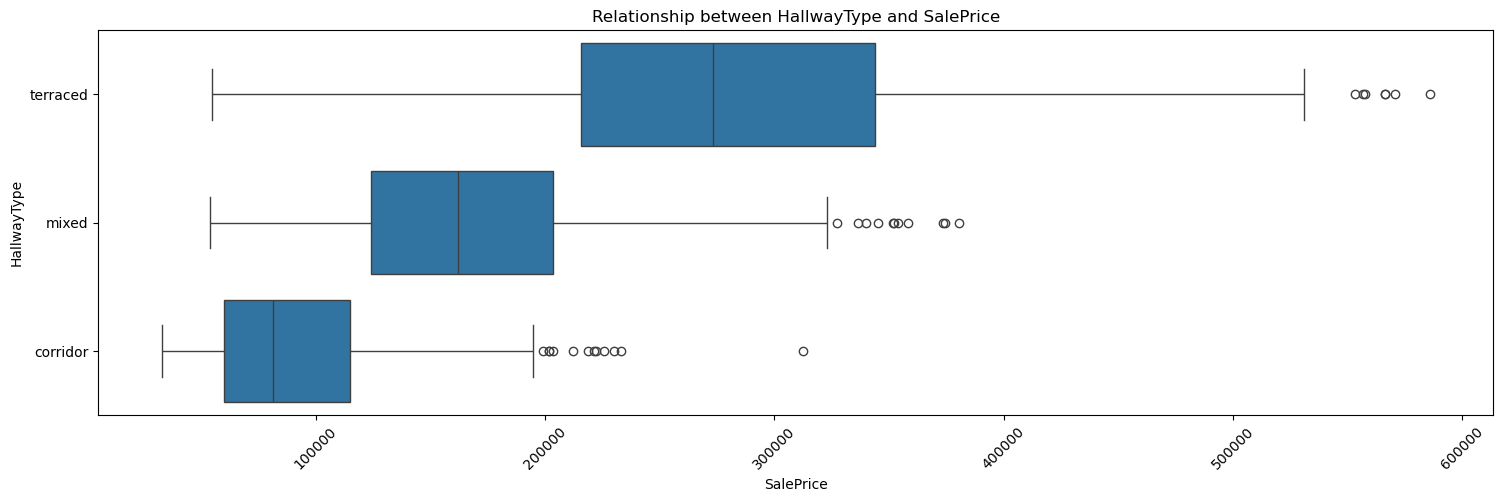

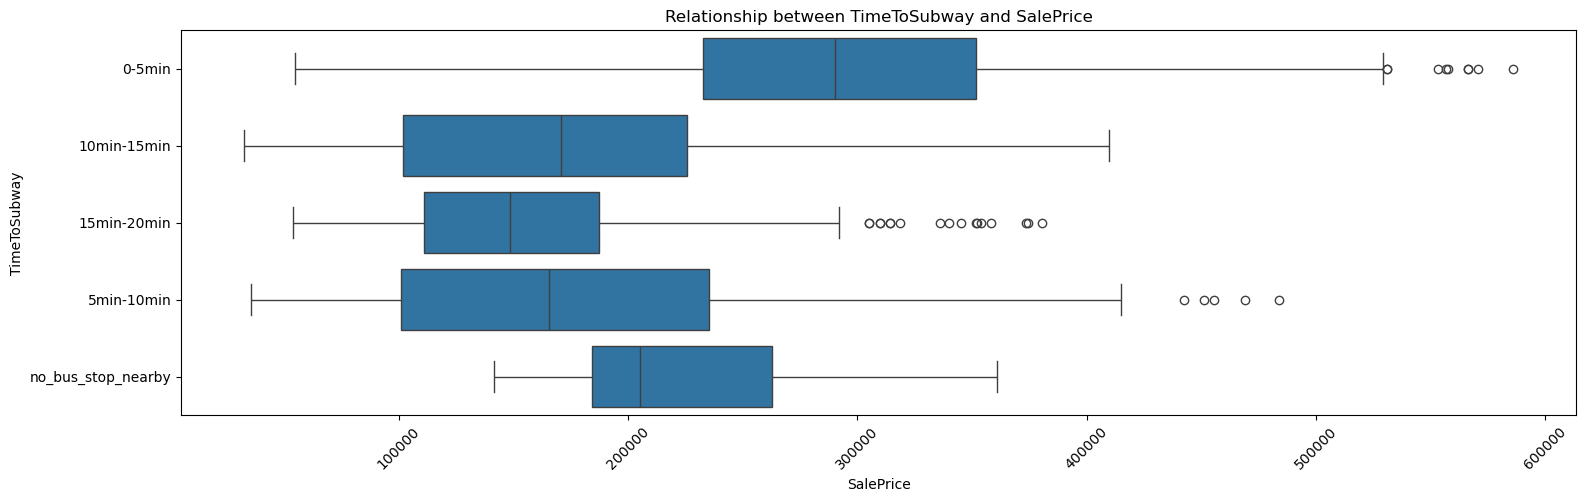

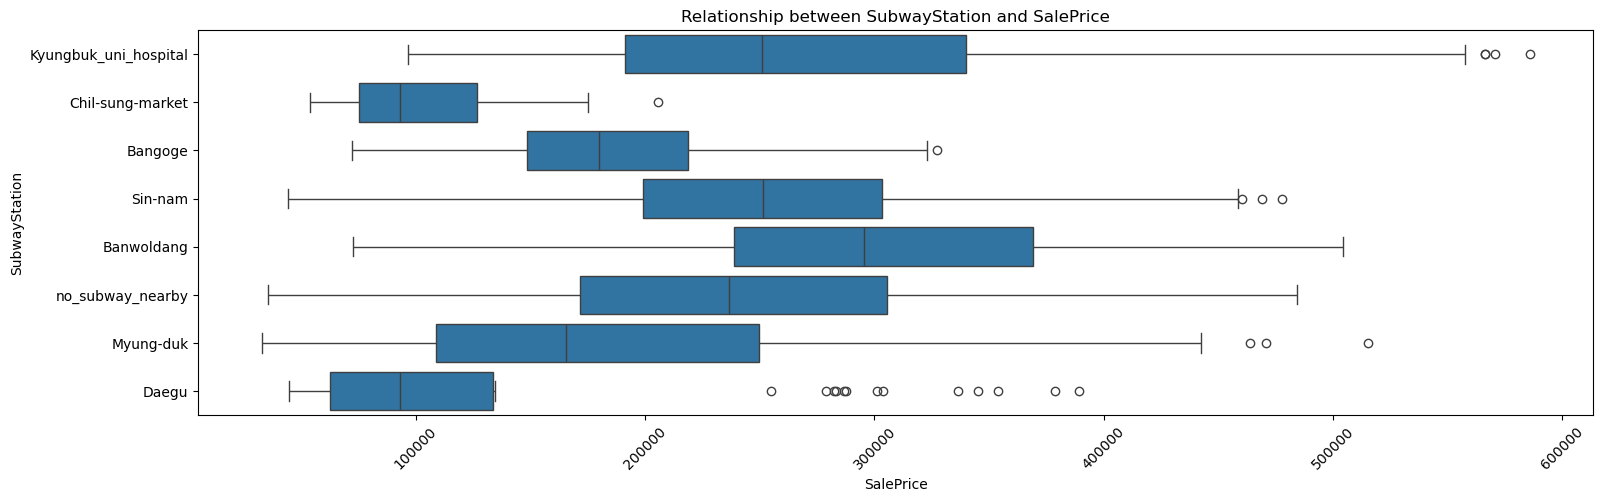

In [38]:
# Boxplot for Categorical Variables
for col in categorical_var:
    plt.figure(figsize=(18, 5))
    sns.boxplot(data=df, y=col, x='SalePrice')
    plt.title(f'Relationship between {col} and SalePrice')
    plt.ylabel(col)
    plt.xlabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()

Analysis:
1. Hallway Type and Sale Price: 
* Terraced HallwayType apartment seem to have a higher median SalePrice than Mixed and Corridor. This might point to a propensity in the market with Terraced HallwayType apartment.
* Particularly all types of Hallway Type apartment, there are a lot of outliers, which suggests that some apartment are selling for a lot more than others in the same category. This might be the result of special qualities or a really appealing location.

2. Time to Subway and Sale Price: 
* Apartments that are five minutes or less from a Subway Station typically sell for more money than apartment that are farther away. This highlights how crucial having convenient access to public transportation is when determining a property's worth.
* Apartments situated 10-15 minutes and 15-20 minutes from the station do not significantly differ in sales price; this could mean that purchasers view these distances as the maximum amount of walkability to the train station.

3. Sale Price and Subway Station: 
* The Sale Price at which goods are sold at various Subway Station differ significantly. The price distribution of properties near Kyungbuk_uni_hospital and Myung-duk stations is greater.
* Stations like Daegu have a smaller distribution and a lower median Sale Price, which may suggest that the homes in this area are not as desirable as those in other places.

### 3.3. Data Correlation

A correlation matrix is a table showing correlation coefficients between sets of variables or to used to evaluate the relationship between two or more variables in a dataset. It's a table where each cell contains a correlation coefficient, which ranges from -1 to 1. Here's what these values mean:

* -1 indicates a perfectly negative linear correlation between two variables.
* 0 indicates no linear correlation between two variables.
* 1 indicates a perfectly positive linear correlation between two variables

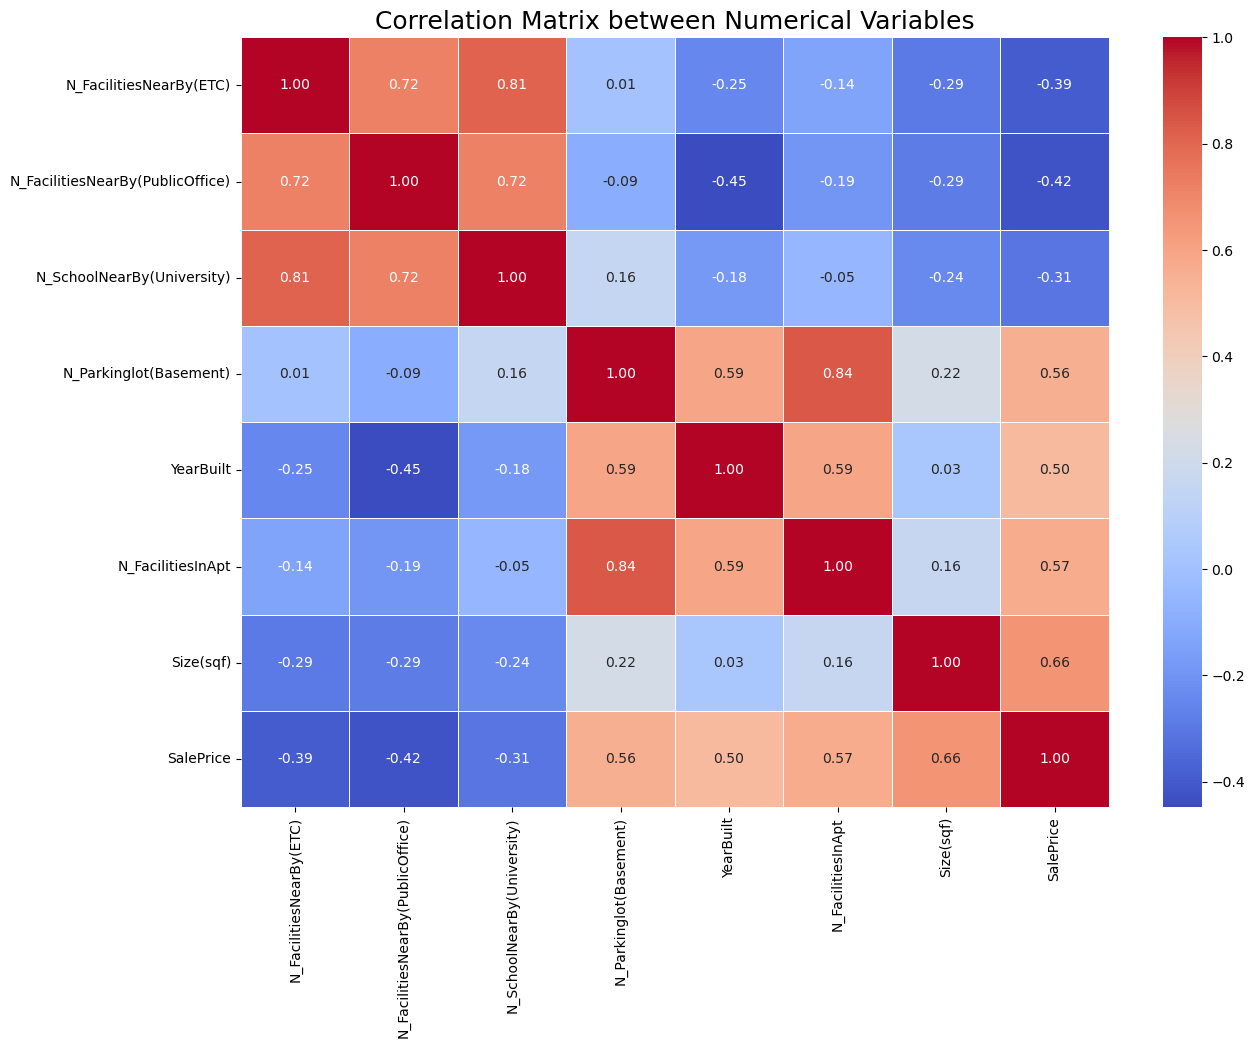

In [40]:
# Only shown for numeric feature
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix between Numerical Variables', fontsize=18)
plt.show()

The data correlation above provides us with the following insights:

1. `Nearest Facilities (ETC, PublicOffice, University)`: The number of adjacent facilities (ETC, PublicOffice, and University) exhibits a robust and affirmative link. This implies that a property is probably close to another type of facility if it is close to one type.
2. `YearBuilt and N_FacilitiesInApt` : There is a moderate positive association between the year of construction (YearBuilt) and the quantity of amenities in the apartment (N_FacilitiesInApt), suggesting that newer homes typically feature more interior amenities.
3. `YearBuilt and SalePrice` : The two variables have a somewhat positive association, which may suggest that newer homes will fetch higher prices.
4. `Size and SalePrice` : There is a substantial positive correlation between the size of the property (Size(sqf)) and the sale price (SalePrice), indicating that the size of the property has a significant role in deciding the sale price.
5. `Nearest Facilities and SalePrice` : The number of local amenities (ETC, Public Office, University) does not significantly correlate with the selling price, suggesting that the existence of these facilities may not have a large direct impact on the selling price of the property.
6. `N_Parkinglot(Basement) and SalePrice` : There appears to be a weak positive correlation between the number of parking spaces in the basement (N_Parkinglot(Basement)) and the sales price. This suggests that the availability of parking spaces may not be the primary factor influencing property values.

### 3.4. Analysis

Next we will explore the relationships between various variables. In this case there are several questions:
1. What is the relationship between YearBuilt and SalePrice
2. What is the relationship between Size and SalePrice
3. What is the relationship between Nearest Facilities and SalePrice
4. What is the relationship between Hallway_Type and SalePrice

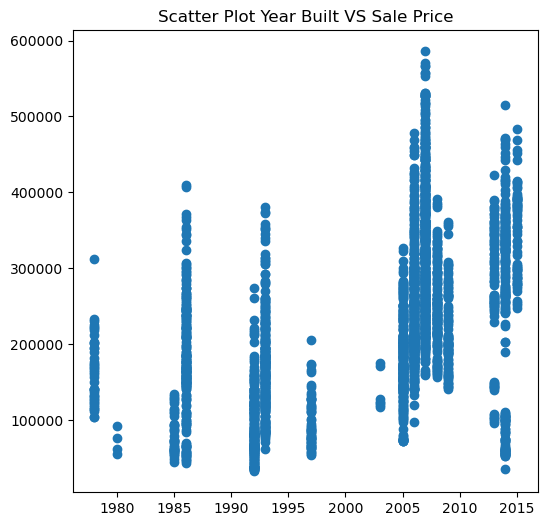

In [41]:
# relationship between YearBuilt and SalePrice
plt.figure(figsize=(6, 6))
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.title('Scatter Plot Year Built VS Sale Price')
plt.show()

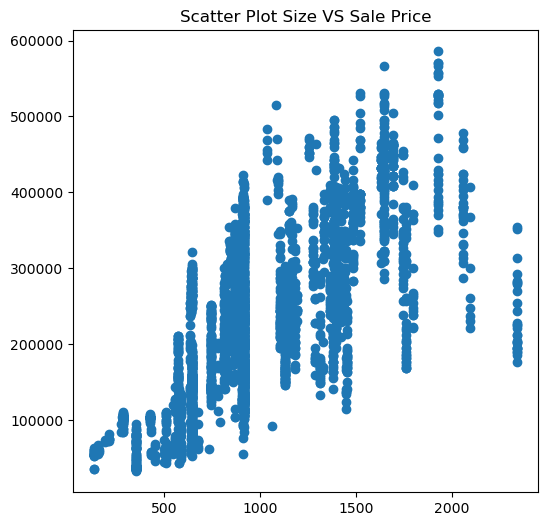

In [52]:
# relationship between Size and SalePrice
plt.figure(figsize=(6, 6))
plt.scatter(df['Size(sqf)'], df['SalePrice'])
plt.title('Scatter Plot Size VS Sale Price')
plt.show()

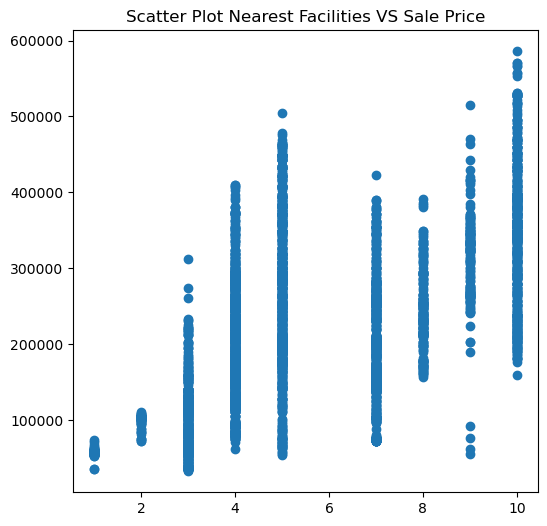

In [53]:
# relationship between Nearest Facilities and SalePrice
plt.figure(figsize=(6, 6))
plt.scatter(df['N_FacilitiesInApt'], df['SalePrice'])
plt.title('Scatter Plot Nearest Facilities VS Sale Price')
plt.show()

Here are some conclusions regarding the relationship between the variables in the dataset:

1. YearBuilt: The sales prices vary greatly between the years of construction. Certain historical periods seem to fetch greater prices for properties, which could mean that prospective purchasers are evaluating aspects like the building's age, contemporary architectural styles, or construction materials.
2. Size (sqf): The relationship between the sale price and property size is clearly favourable, with larger properties typically selling for greater prices. Nonetheless, there is a significant price range for a particular size of property, suggesting that other criteria are as crucial in determining pricing.
3. N_FacilitiesInApt: Some houses with lots of facilities do command higher rates, there are notable differences in price across categories according to the price distribution.

HallwayType,corridor,mixed,terraced
HallwayType,464,1131,2528


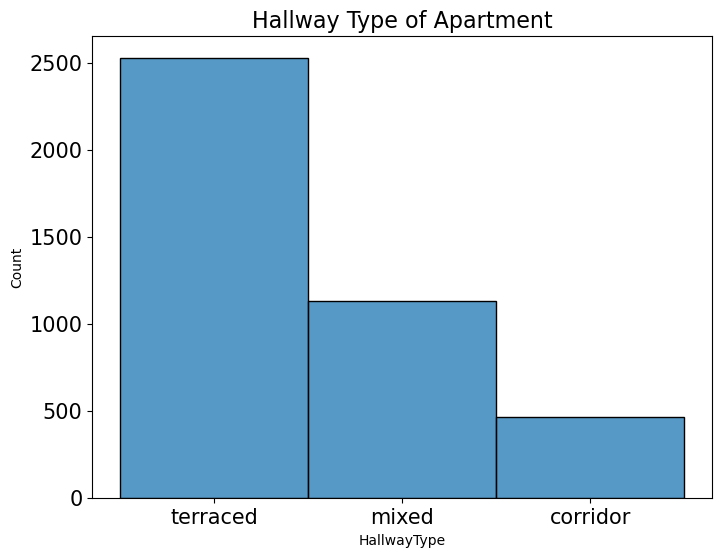

In [56]:
# Relationship between Sale Price and Hallway type
dfCount_Saleprice = df.groupby('HallwayType').agg({'HallwayType':'count'})
display(dfCount_Saleprice.T)

plt.figure(figsize=(8,6))
sns.histplot(df['HallwayType'])
plt.title('Hallway Type of Apartment', size=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 

plt.show()

Analysis:
1. With a total of 2528 apartment units, terraced apartments are the first largest form of apartments.
2. With 1131 apartment units, mixed apartments are the second most common form.
3. With 464 apartment units, the type of apartment with the fewest types is the corridor.

TimeToSubway,0-5min,10min-15min,15min-20min,5min-10min,no_bus_stop_nearby
TimeToSubway,1953,583,629,787,171


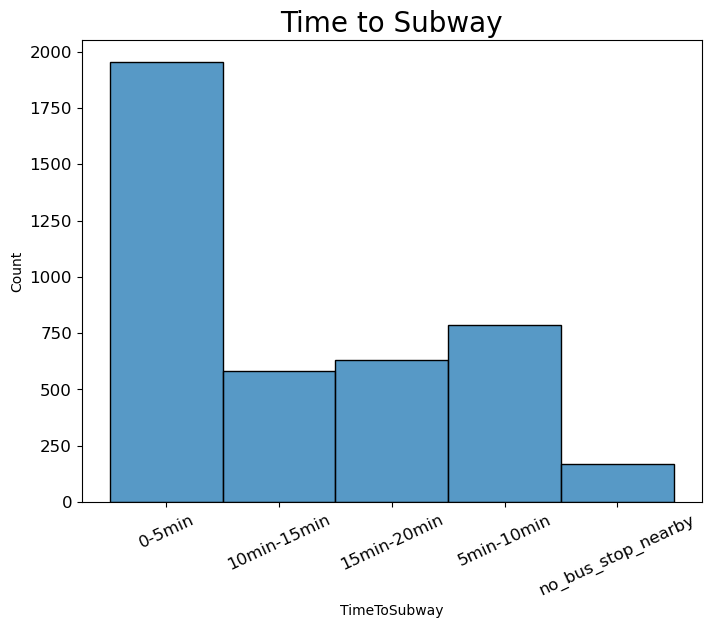

In [63]:
# Count Time To Subway Apartment
df_price_to_tsubway = df.groupby('TimeToSubway').agg({'TimeToSubway':'count'})
display(df_price_to_tsubway.T)

plt.figure(figsize=(8,6))
sns.histplot(df['TimeToSubway'])
plt.title('Time to Subway', size=20)
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12) 

plt.show()

The majority of the apartments are situated in close proximity to the Subway Station, as we can see from the histplot by the highest number of Time To Subway 0-5 min among the 1953 housing units.

Text(0.5, 1.0, 'Hallway Type VS Year Built')

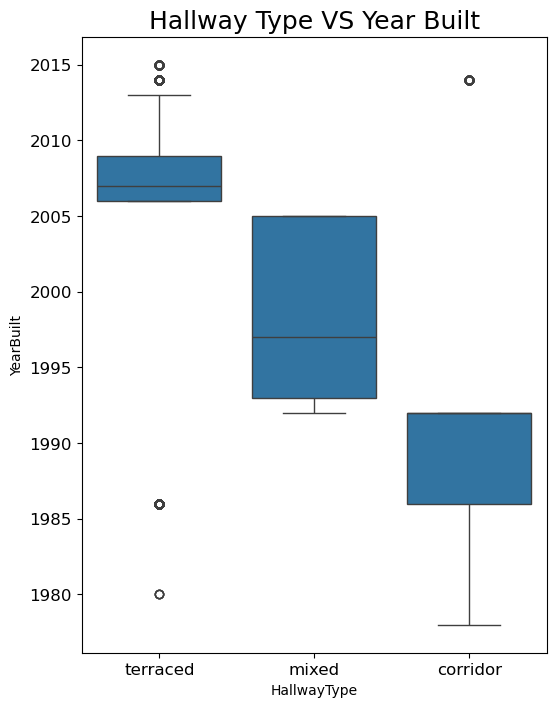

In [57]:
# Relationship between Hallway Type dan Year Built
plt.subplots(figsize=(6,8))
sns.boxplot(x='HallwayType', y='YearBuilt', data=df)
plt. xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.title('Hallway Type VS Year Built', size=18)

Analysis:
1. Many of the Apartment in the Hallway Corridor type were constructed under 1995.
2. Most Apartments of the Hallway Mixed type were constructed between 1995 until 2005.
3. Many Apartments in the Hallway Terraced style were constructed in 2005 and later. Its so rarely to find apartments of the Hallway Mixed and Corridor types constructed in this year(2005).


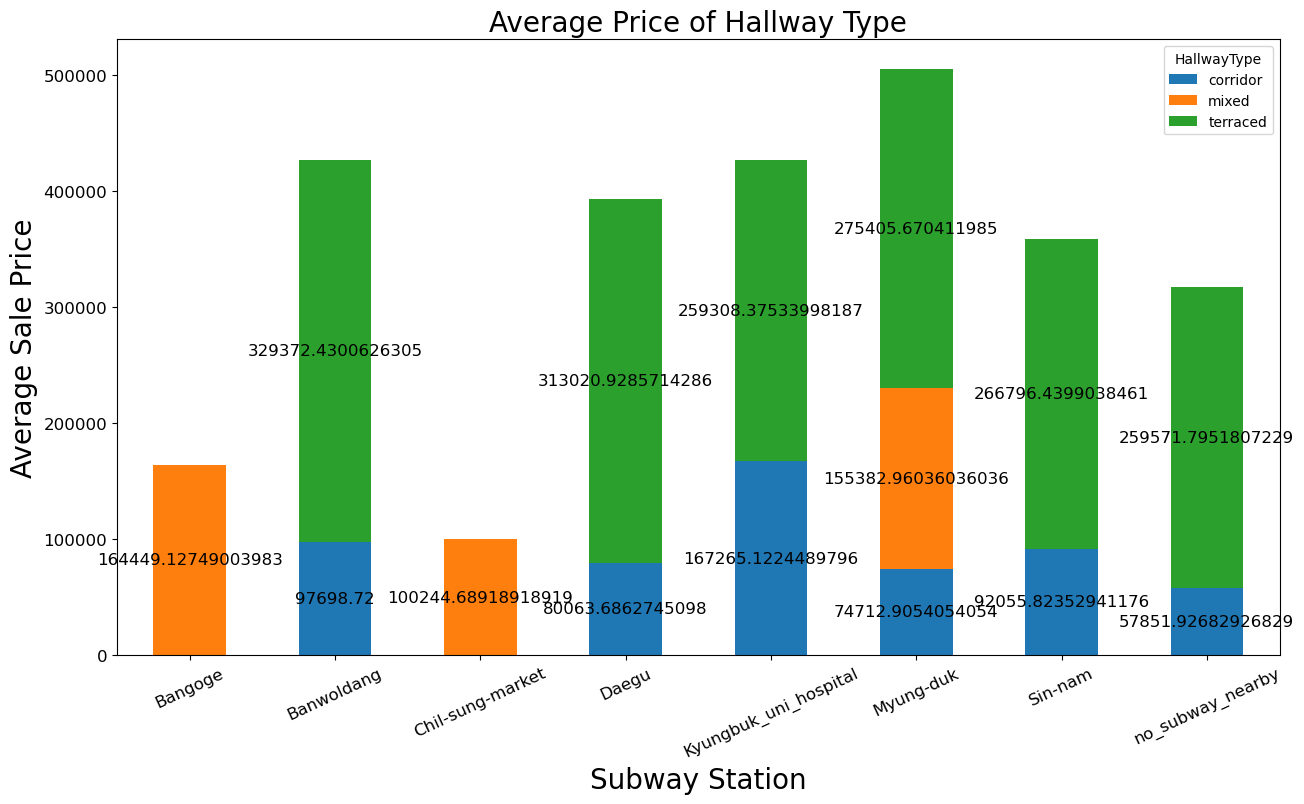

In [58]:
# Apartment based of hallway type and nearest subway station
table = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='mean')

mean_price = table.plot(kind='bar', stacked=True, figsize=(15,8), fontsize=15)
for i in mean_price.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in i]
    mean_price.bar_label(i, labels=labels, label_type='center', fontsize=12)
plt.xlabel('Subway Station', fontsize=20)
plt.ylabel('Average Sale Price', fontsize = 20)
plt.title('Average Price of Hallway Type', fontsize=20)
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12) 
plt.show()

In comparison to Mixed type apartments, Corridor type apartments have the lowest average sale price. The average cost of sale price an apartment is higher for terraced type apartment than for corridor and mixed type appartment. Aside from that, the most expensive apartement are those near the Myung-duk Subway Station.

## 4. MODELING

In [42]:
# Import library untuk modeling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, cross_validate

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

 ### 4.1.  Feature Engineering

In [43]:
data = df.copy()

In [44]:
data

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min-15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,818,290265
4117,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0,3,2,475,2008,8,914,323008
4119,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1451,242477


#### Encoding

In [45]:
ordinal_mapping = [
    {'col':'TimeToSubway', 'mapping':
        {'0-5min':4, '5min-10min':3, '10min-15min':2, '15min-20min':1, 'no_bus_stop_nearby':0,} }]

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)),
    ('scaler', RobustScaler())
])
# Create the transformer
transformer = ColumnTransformer([
    ('robust', RobustScaler(),['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)'] ),
    ('OneHot', OneHotEncoder(drop='first'), ['HallwayType']),
    ('Binary', BinaryEncoder(), ['SubwayStation']),
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['TimeToSubway'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_Parkinglot(Basement)', 'YearBuilt',
                                  'N_FacilitiesInApt', 'Size(sqf)']),
                                ('OneHot', OneHotEncoder(drop='first'),
                                 ['HallwayType']),
                                ('Binary', BinaryEncoder(), ['SubwayStation']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['TimeToSubway'],
                                                                 mapping=[{'col': 'TimeToSubway',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': 0-5min                4
5min-10min            3
10min-15min           2
15min-20min           1
no_bus_stop_nearby    0
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['TimeToSubway'])])

1. There are characteristics in this dataset with the Object data type; these features need to be encoded in order to be used in machine learning.
2. Since HallwayType only has 3 categories, OneHotEncoding is used to encode it.
3. Because SubwayStation has 8 categories, binary encoding is used to encode it.
4. TimeToSubway is encoded using Ordinal Encoding since the data will be ordered, where lowest score values indicate better categories.

### 4.2. Train Test Splitting

Previously we will define the variables X and Y. In regression modeling, X an independent variable that is used to predict the value of Y or the dependent variable. Meanwhile Y is the dependent variable or the variable you want to predict.

In [46]:
# Splitting data to be data independent and data dependent/target
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

The data is separated into 2 parts, namely 75% for training data and 25% for testing data. Training data is used to train machine learning models, while testing data is used to test the performance of models that have been trained.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 4.3. Benchmark Model

We will choose a benchmark model to identify the reference model that will be used as a basis for comparison to compare the performance of the newly constructed model once the dataset has been divided into training and testing data.

Choose Linear Regression, KNN Regressor, DecisionTree Regressor, Random Forest Regressor, XGBoost Regressor, and LGBM Regressor to find the best model to be used.

In [49]:
# Define Algoritm to be use
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)


# Data Scaling
scaler = RobustScaler()

# Algoritm Candidate
models = [lr, knn, dt, rf, xgb, lgbm]
metrics = {'mae': 'neg_mean_absolute_error',
           'mape':'neg_mean_absolute_percentage_error',
           'rmse':'neg_root_mean_squared_error'}
score_mae = []
score_mape = []
score_rmse = []


# looking for best algoritm based on MAE Value
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42) # sum Fold

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])
    scores = cross_validate(estimator,X_train, y_train, cv=crossval, scoring=metrics)
    
    score_mae.append(abs(scores['test_mae'].mean()))
    score_mape.append(abs(scores['test_mape'].mean()))
    score_rmse.append(abs(scores['test_rmse'].mean()))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 1620, number of used features: 14
[LightGBM] [Info] Start training from score 228652.679012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 1620, number of used features: 14
[LightGBM] [Info] Start training from score 229233.619136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

Use RobustScaler:

RobustScaler is a scaler that is resistant to outliers. This scaler uses methods such as medians and quartiles to transform data into a specific range.

In [51]:
model_bench= pd.DataFrame({
    'Model' : ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LGBM Regressor'],
    'MAE': score_mae,
    'MAPE': score_mape,
    'RMSE': score_rmse    
})   
model_bench.sort_values('MAE', ascending=True)

,Model,MAE,MAPE,RMSE
2,Decision Tree,36793.783123,0.189502,45658.591413
4,XGBoost,36820.623272,0.189791,45690.859986
3,Random Forest,36849.929911,0.190183,45717.063493
5,LGBM Regressor,37011.331196,0.191228,45826.812352
1,KNN,39004.363654,0.203405,49446.803655
0,Linear Regression,42375.725805,0.219933,52389.060930


Metrics measurement:

1. MAE (Mean Absolute Error) measures the average absolute difference between predictions and actual values, without considering the direction of the differences.

2. MAPE (Mean Absolute Percentage Error) measures the percentage difference between predictions and actual values, providing an indication of the relative percentage error in predictions.

3. RMSE (Root Mean Square Error) measures the square root of the average of the squared differences between predictions and actual values, giving more weight to larger differences.

The 4 algorithm models with the best similar values are; DecisionTree, XGBoost, RandomForest, and LGBM Regressor based on the training results above. The noticeably low Mean Absolute Error (MAE) figure indicates this.

Select MAE because: MAE (Mean Absolute Error) can be used to predict apartment prices. The average of the absolute differences between the values that were predicted and the values that were actually obtained is how the evaluation metric known as MAE (Mean Absolute Error) calculates prediction errors.

### 4.4. Predict Test Set with 4 Best Benchmark Model

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    'DecisionTree Regression Before Tuning': DecisionTreeRegressor(random_state=42),
    'RandomForest Regression Before Tuning': RandomForestRegressor(random_state=42),
    'XGBoost Regression Before Tuning': XGBRegressor(random_state=42),
    'LGBM Regression Before Tuning': LGBMRegressor(random_state=42)}

score_mae = []
score_mape = []
score_rmse = []

# Predict on test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred)) #Calculate MAE
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))  # Calculate MAPE
    score_rmse.append(mean_squared_error(y_test, y_pred, squared=False))  # Calculate RMSE

score_before_tuning = pd.DataFrame({
    'Model': list(models.keys()),
    'MAE': score_mae,
    'MAPE': score_mape,
    'RMSE': score_rmse
})

print('Testing Result Before Tuning')
score_before_tuning.sort_values('MAE', ascending=True)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 2025, number of used features: 14
[LightGBM] [Info] Start training from score 229133.959506
Testing Result Before Tuning


,Model,MAE,MAPE,RMSE
3,LGBM Regression Before Tuning,38831.895503,0.195765,47852.900793
2,XGBoost Regression Before Tuning,39005.694792,0.195932,48109.514921
1,RandomForest Regression Before Tuning,39052.333906,0.197426,48125.141812
0,DecisionTree Regression Before Tuning,39188.868617,0.198920,48637.842951


After do the prediction test on data testing, show that the LGBM is the best choice because model has the lowest value (MAE, MAPE, RMSE), but the other algorithms do not have a significant difference. Therefore, I will proceed with performing Hyperparameter Tuning on all models above.

### 4.5. Hyperparameter Tuning

In order to increase the machine learning model's accuracy and performance, we will now do hyperparameter tuning to determine the ideal set of parameters. Measuring how well a model can generalize and how it compares to other models can be done using Cross Validation.

In order to enhance model performance and select the optimal model, we will hyperparameter tune for the Decision Tree, Random Forest, XGBoost models and LGBM Regressor.

#### LGBM Regerssor

In [57]:
hyperparam_space_lgbm = {
    'model__max_depth': list(range(1, 21)),
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__n_estimators': [50, 100, 200, 400],
    'model__num_leaves': [10, 20, 30, 40],
    'model__min_child_samples': [1, 3, 5, 10],
    'model__subsample': [0.5, 0.7, 0.9, 1.0],
    'model__colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'model__reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'model__reg_lambda': [0.0, 0.1, 0.5, 1.0]
}

lgbm = LGBMRegressor(random_state=42)

estimator_lgbm = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', lgbm)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
lgbm_tune = RandomizedSearchCV(
    estimator_lgbm,
    param_distributions=hyperparam_space_lgbm,
    n_iter=50,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_mean_absolute_error',
    random_state=42
)

lgbm_tune.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 2025, number of used features: 14
[LightGBM] [Info] Start training from score 229133.959506


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust',
                                                                               RobustScaler(),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'N_FacilitiesInApt',
                                                                                'Size(sqf...
                                        'model__min_child_samples': [1, 3, 5,
                                                                     10],
                                        'model__n_estimators': [50, 100, 200,
                                                                400],
                                        'model__num_leaves': [10, 20, 30, 40],
                                        'model__reg_alpha': [0.0, 0.1, 0.5,
                                                             1.0],
                                        'model__reg_lambda': [0.0, 0.1, 0.5,
                                                              1.0],
                                        'model__subsample': [0.5, 0.7, 0.9,
                                                             1.0]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [58]:
print('LGBM Regressor')
print('Best_score:', lgbm_tune.best_score_)
print('Best_params:', lgbm_tune.best_params_)

LGBM Regressor
Best_score: -36737.637484937775
Best_params: {'model__subsample': 0.7, 'model__reg_lambda': 0.0, 'model__reg_alpha': 0.0, 'model__num_leaves': 10, 'model__n_estimators': 400, 'model__min_child_samples': 1, 'model__max_depth': 13, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.9}


#### Decision Tree

In [59]:
hyperparam_space_dt = {
    'model__max_depth': list(range(1, 21)),            
    'model__max_features': list(range(1, 6)),          
    'model__min_samples_split': list(range(2, 20)),    
    'model__min_samples_leaf': list(range(2, 10)),     
    'model__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],  
    'model__max_leaf_nodes': list(range(2, 21)),       
    'model__min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],  
    'model__ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  
}

dt = DecisionTreeRegressor(random_state=42)

estimator_dt = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', dt)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
dt_tune = RandomizedSearchCV(
    estimator_dt,
    param_distributions = hyperparam_space_dt,
    n_iter = 50,
    cv = crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_mean_absolute_error',
    random_state=42
)

dt_tune.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust',
                                                                               RobustScaler(),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'N_FacilitiesInApt',
                                                                                'Size(sqf...
                                                                         0.1,
                                                                         0.2,
                                                                         0.3,
                                                                         0.4,
                                                                         0.5],
                                        'model__min_samples_leaf': [2, 3, 4, 5,
                                                                    6, 7, 8,
                                                                    9],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19],
                                        'model__min_weight_fraction_leaf': [0.0,
                                                                            0.1,
                                                                            0.2,
                                                                            0.3,
                                                                            0.4,
                                                                            0.5]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [60]:
print('Decision Tree Regressor')
print('Best_score:', dt_tune.best_score_)
print('Best_params:', dt_tune.best_params_)

Decision Tree Regressor
Best_score: -42933.29904875501
Best_params: {'model__min_weight_fraction_leaf': 0.0, 'model__min_samples_split': 18, 'model__min_samples_leaf': 4, 'model__min_impurity_decrease': 0.0, 'model__max_leaf_nodes': 15, 'model__max_features': 5, 'model__max_depth': 19, 'model__ccp_alpha': 0.5}


#### XGBoost

In [61]:
# Maximum depth of a tree (integer)
max_depth = list(range(1, 11))

# Learning rate (float)
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.3]

# Number of boosting rounds (integer)
n_estimators = list(range(100, 1001, 100))

# Subsample ratio of the training instances (float)
subsample = [0.6, 0.7, 0.8, 0.9]

# Minimum loss reduction required to make a further partition on a leaf node of the tree (float)
gamma = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# Fraction of columns to be randomly sampled for each tree (float)
colsample_bytree = [0.6, 0.7, 0.8, 0.9]

# L1 regularization term on weights (float)
reg_alpha = [0.0, 0.01, 0.1, 1.0]

# L2 regularization term on weights (float)
reg_lambda = [0.0, 0.01, 0.1, 1.0]

# L2 regularization term on weights (float)
reg_lambda = [0.0, 0.01, 0.1, 1.0]

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'model__reg_lambda':reg_lambda
}

In [62]:
xgb = XGBRegressor(random_state=42, verbosity=0)

estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
xgb_tune = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50, 
    cv = crossval, 
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_mean_absolute_error',
    random_state=42

)

xgb_tune.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust',
                                                                               RobustScaler(),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'N_FacilitiesInApt',
                                                                                'Size(sqf...
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500, 600,
                                                                700, 800, 900,
                                                                1000],
                                        'model__reg_alpha': [0.0, 0.01, 0.1,
                                                             1.0],
                                        'model__reg_lambda': [0.0, 0.01, 0.1,
                                                              1.0],
                                        'model__subsample': [0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [63]:
print('XGBoost')
print('Best_score:', xgb_tune.best_score_)
print('Best_params:', xgb_tune.best_params_)

XGBoost
Best_score: -36640.62538194445
Best_params: {'model__subsample': 0.6, 'model__reg_lambda': 1.0, 'model__reg_alpha': 1.0, 'model__n_estimators': 300, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'model__gamma': 0.3, 'model__colsample_bytree': 0.6}


#### Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Maximum number of leaf nodes in each tree
max_leaf_nodes = list(range(10, 101, 10))

# Minimum impurity decrease required for split
min_impurity_decrease = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# Whether to use out-of-bag samples to estimate the R^2 score on unseen data
oob_score = [True, False]

# Whether to enable bootstrap sampling with replacement
bootstrap = [True, False]

# Minimum number of samples required to be at a leaf node
min_samples_leaf = list(range(1, 11))

# Maximum number of features to consider for each tree
max_features = ['auto', 'sqrt', 'log2', None]

# Criterion used for splitting
criterion = ['mse', 'friedman_mse', 'poisson']

# Minimum number of samples required to split an internal node
min_samples_split = list(range(2, 21))

# Hyperparam Space Random Forest
hyperparam_space_rf = {
    'model__n_estimators': n_estimators,                
    'model__max_features': max_features,                
    'model__max_depth': max_depth,                      
    'model__min_samples_split': min_samples_split,      
    'model__min_samples_leaf': min_samples_leaf,        
    'model__max_leaf_nodes': max_leaf_nodes,            
    'model__min_impurity_decrease': min_impurity_decrease,  
    'model__oob_score': oob_score,                      
    'model__bootstrap': bootstrap,                      
    'model__criterion': criterion                   
}

In [65]:
rf = RandomForestRegressor(random_state=42)

estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', rf)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
rf_tune = RandomizedSearchCV(
    estimator_rf,
    param_distributions=hyperparam_space_rf,
    n_iter=50,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_mean_absolute_error',
    random_state=42
)

rf_tune.fit(X_train, y_train)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust',
                                                                               RobustScaler(),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'N_FacilitiesInApt',
                                                                                'Size(sqf...
                                        'model__min_samples_leaf': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19, 20],
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500, 600,
                                                                700, 800, 900,
                                                                1000],
                                        'model__oob_score': [True, False]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [66]:
print('RandomForest Regressor')
print('Best_score:', rf_tune.best_score_)
print('Best_params:', rf_tune.best_params_)

RandomForest Regressor
Best_score: -36764.89268681122
Best_params: {'model__oob_score': False, 'model__n_estimators': 400, 'model__min_samples_split': 8, 'model__min_samples_leaf': 2, 'model__min_impurity_decrease': 0.0, 'model__max_leaf_nodes': 70, 'model__max_features': None, 'model__max_depth': 9, 'model__criterion': 'poisson', 'model__bootstrap': False}


#### Predict to Test Set with the Tuned Model

In [67]:
model = LGBMRegressor(random_state=42)

# Define model to best estimator
lgbm_tuning = lgbm_tune.best_estimator_

# Fitting model
lgbm_tuning.fit(X_train, y_train)

# Predict test set
y_pred_lgbm_tuning = lgbm_tuning.predict(X_test)

# value metrics RMSE, MAE & MAPE setelah tuning
mae_lgbm_tuning = mean_absolute_error(y_test, y_pred_lgbm_tuning)
mape_lgbm_tuning = mean_absolute_percentage_error(y_test, y_pred_lgbm_tuning)
rmse_lgbm_tuning = mean_squared_error(y_test, y_pred_lgbm_tuning)

score_after_tuning_lgbm = pd.DataFrame({'Model': 'LGBM Regressio After Tuning',
                                        'MAE': [mae_lgbm_tuning],
                                        'MAPE': [mape_lgbm_tuning],
                                        'RMSE':[rmse_lgbm_tuning]})
score_after_tuning_lgbm

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 2025, number of used features: 14
[LightGBM] [Info] Start training from score 229133.959506


,Model,MAE,MAPE,RMSE
0,LGBM Regressio After Tuning,38990.431886,0.19665,2.308726e+09


In [68]:
model = {'DecisionTree': DecisionTreeRegressor(random_state=42)}

dt_tuning = dt_tune.best_estimator_

# Fitting model
dt_tuning.fit(X_train, y_train)

# Prdict test set
y_pred_dt_tuning = dt_tuning.predict(X_test)


mae_dt_tuning = mean_absolute_error(y_test, y_pred_dt_tuning)
mape_dt_tuning = mean_absolute_percentage_error(y_test, y_pred_dt_tuning)
rmse_dt_tuning = mean_squared_error(y_test, y_pred_dt_tuning)

score_after_tuning_dt = pd.DataFrame({'Model': 'DecisionTree Regression After Tuning',
                                        'MAE': [mae_dt_tuning],
                                        'MAPE': [mape_dt_tuning],
                                        'RMSE':[rmse_dt_tuning]})
score_after_tuning_dt

,Model,MAE,MAPE,RMSE
0,DecisionTree Regression After Tuning,44261.707414,0.232128,2.929687e+09


In [69]:
model = XGBRegressor(random_state=42)

xgb_tuning = xgb_tune.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# metrics RMSE, MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = mean_squared_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'Model': 'XGBoost Regression After Tuning',
                                        'MAE': [mae_xgb_tuning],
                                        'MAPE': [mape_xgb_tuning],
                                        'RMSE':[rmse_xgb_tuning]})
score_after_tuning_xgb

,Model,MAE,MAPE,RMSE
0,XGBoost Regression After Tuning,38674.226031,0.194136,2.270947e+09


In [70]:
model = {'RandomForest': RandomForestRegressor(random_state=42)}

rf_tuning = rf_tune.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Prdict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# metrics RMSE setelah tuning
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)
rmse_rf_tuning = mean_squared_error(y_test, y_pred_rf_tuning)
score_after_tuning_rf = pd.DataFrame({'Model': 'Random Forest Regression After Tuning',
                                        'MAE': [mae_rf_tuning],
                                        'MAPE': [mape_rf_tuning],
                                        'RMSE':[rmse_rf_tuning]})
score_after_tuning_rf

,Model,MAE,MAPE,RMSE
0,Random Forest Regression After Tuning,39260.80176,0.199579,2.381850e+09


#### Performance Comparison Before and After Hyperparameter Tuning

In [71]:
score_before_tuning.sort_values('MAE')

,Model,MAE,MAPE,RMSE
3,LGBM Regression Before Tuning,38831.895503,0.195765,47852.900793
2,XGBoost Regression Before Tuning,39005.694792,0.195932,48109.514921
1,RandomForest Regression Before Tuning,39052.333906,0.197426,48125.141812
0,DecisionTree Regression Before Tuning,39188.868617,0.198920,48637.842951


In [72]:
score_after_tuning = pd.concat([score_after_tuning_lgbm,score_after_tuning_xgb,score_after_tuning_dt,score_after_tuning_rf]).reset_index()
score_after_tuning.drop(columns='index').sort_values('MAE', ascending=True)

,Model,MAE,MAPE,RMSE
1,XGBoost Regression After Tuning,38674.226031,0.194136,2.270947e+09
0,LGBM Regressio After Tuning,38990.431886,0.196650,2.308726e+09
3,Random Forest Regression After Tuning,39260.801760,0.199579,2.381850e+09
2,DecisionTree Regression After Tuning,44261.707414,0.232128,2.929687e+09


After tuning, the XGBoost model's MAE value is lower than that of the other models in the comparison. This suggests that when it comes to predicting apartment pricing, the XGBoost model has less prediction error.

XGBoost and LGBM have a similar premise in that they both construct an ensemble model from a number of weak learners. But in terms of how they operate, LGBM builds trees using a "leaf-wise" method in which the highest gain determines each splitting step at each tree level. 
By evenly splitting at each level, XGBoost, on the other hand, builds trees level by level using a "level-wise" strategy.

Variations in the overall functioning mechanisms of LGBM and XGBoost result from differences in how their tree structures are constructed. Unlike XGBoost's level-wise technique, LGBM's leaf-wise approach enables deeper trees with fewer branches. This can lead to more elaborate models that can capture complex patterns, but if they are not managed appropriately, they may also be prone to overfitting.

* The results obtained show that the MAE in the XGBoost model is better than others, with the smallest MAE value being 38674.226031. The lower the MAE value (closer to 0), the better the model is at accurately predicting the target value.
* The results obtained show that the MAPE in the XGBoost model is better than others, with the smallest MAPE value being 0.194136. The lower the MAPE value, the better the model is at accurately predicting the target value in terms of percentage error, with values below 20 % being considered very good, especially if the model is the result of careful improvement and tuning efforts.

### 4.6. Actual vs. Prediction SalePrice Plot

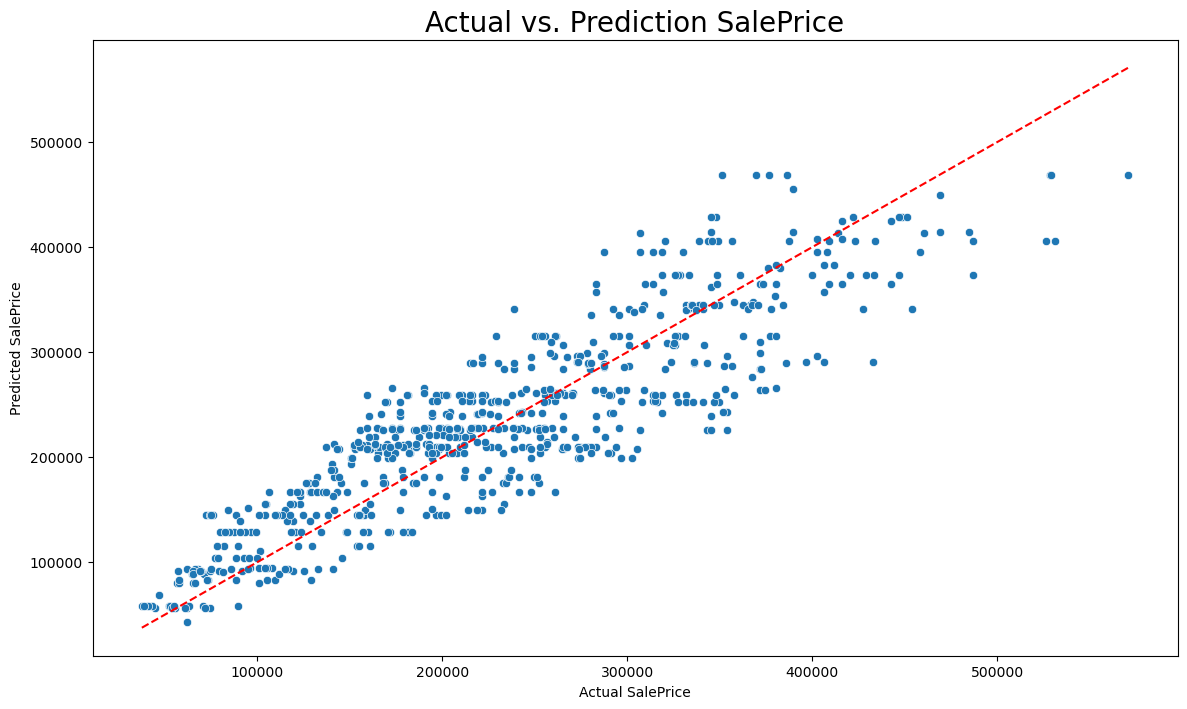

In [73]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs. Prediction SalePrice', size=20)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

* From this graph it can be concluded that the model has good predictive ability, with most predictions relatively close to the actual value, although there are several outliers where the model is quite far from the actual price. 
* The majority of the points are scattered somewhat closely around the red dashed line, suggesting that the XGBoost model is making decent predictions for most houses.
* This graph shows the visual depiction of the accuracy with which the XGBoost model predicts the SalePrice values following tuning. The model's predictions are more accurate the closer the spots are to the diagonal line.

### 4.7. Residual Plot

In [74]:
# Residual = y_actual - y_prediksi
residual = y_test-y_pred_xgb_tuning

df_residual = pd.DataFrame({
    'y_pred': y_pred_xgb_tuning,
    'residual': residual 
})

df_residual.head()

,y_pred,residual
2927,405694.21875,28083.78125
1427,286658.25000,69978.75000
2081,210085.00000,-8316.00000
352,283921.31250,87759.68750
1861,139201.71875,-19732.71875


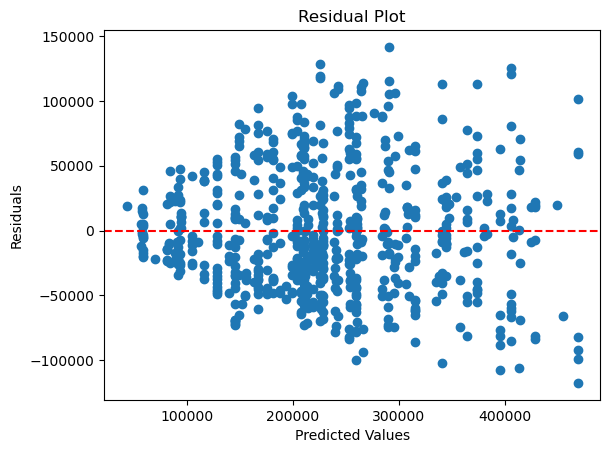

In [75]:
residuals = y_test - y_pred_xgb_tuning

# Plot residual plot
plt.scatter(y_pred_xgb_tuning, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Based on the residual plot above, the residuals appear to be randomly distributed along the horizontal axis and do not have a specific pattern, indicating that the regression model is generally suitable for data on apartment prices in Daegu, South Korea. 

### 4.8. Feature Importances

In [76]:
col_names = transformer.get_feature_names_out()
col_names

array(['robust__N_FacilitiesNearBy(ETC)',
       'robust__N_FacilitiesNearBy(PublicOffice)',
       'robust__N_SchoolNearBy(University)',
       'robust__N_Parkinglot(Basement)', 'robust__YearBuilt',
       'robust__N_FacilitiesInApt', 'robust__Size(sqf)',
       'OneHot__HallwayType_mixed', 'OneHot__HallwayType_terraced',
       'Binary__SubwayStation_0', 'Binary__SubwayStation_1',
       'Binary__SubwayStation_2', 'Binary__SubwayStation_3',
       'pipe_ordinal_scale__TimeToSubway'], dtype=object)

In [77]:
# Remove first word and  "__" from each featuress
col_names_remove = np.array([name.split('__', 1)[1] for name in col_names])
col_names_remove

array(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
       'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)', 'HallwayType_mixed',
       'HallwayType_terraced', 'SubwayStation_0', 'SubwayStation_1',
       'SubwayStation_2', 'SubwayStation_3', 'TimeToSubway'], dtype='<U32')

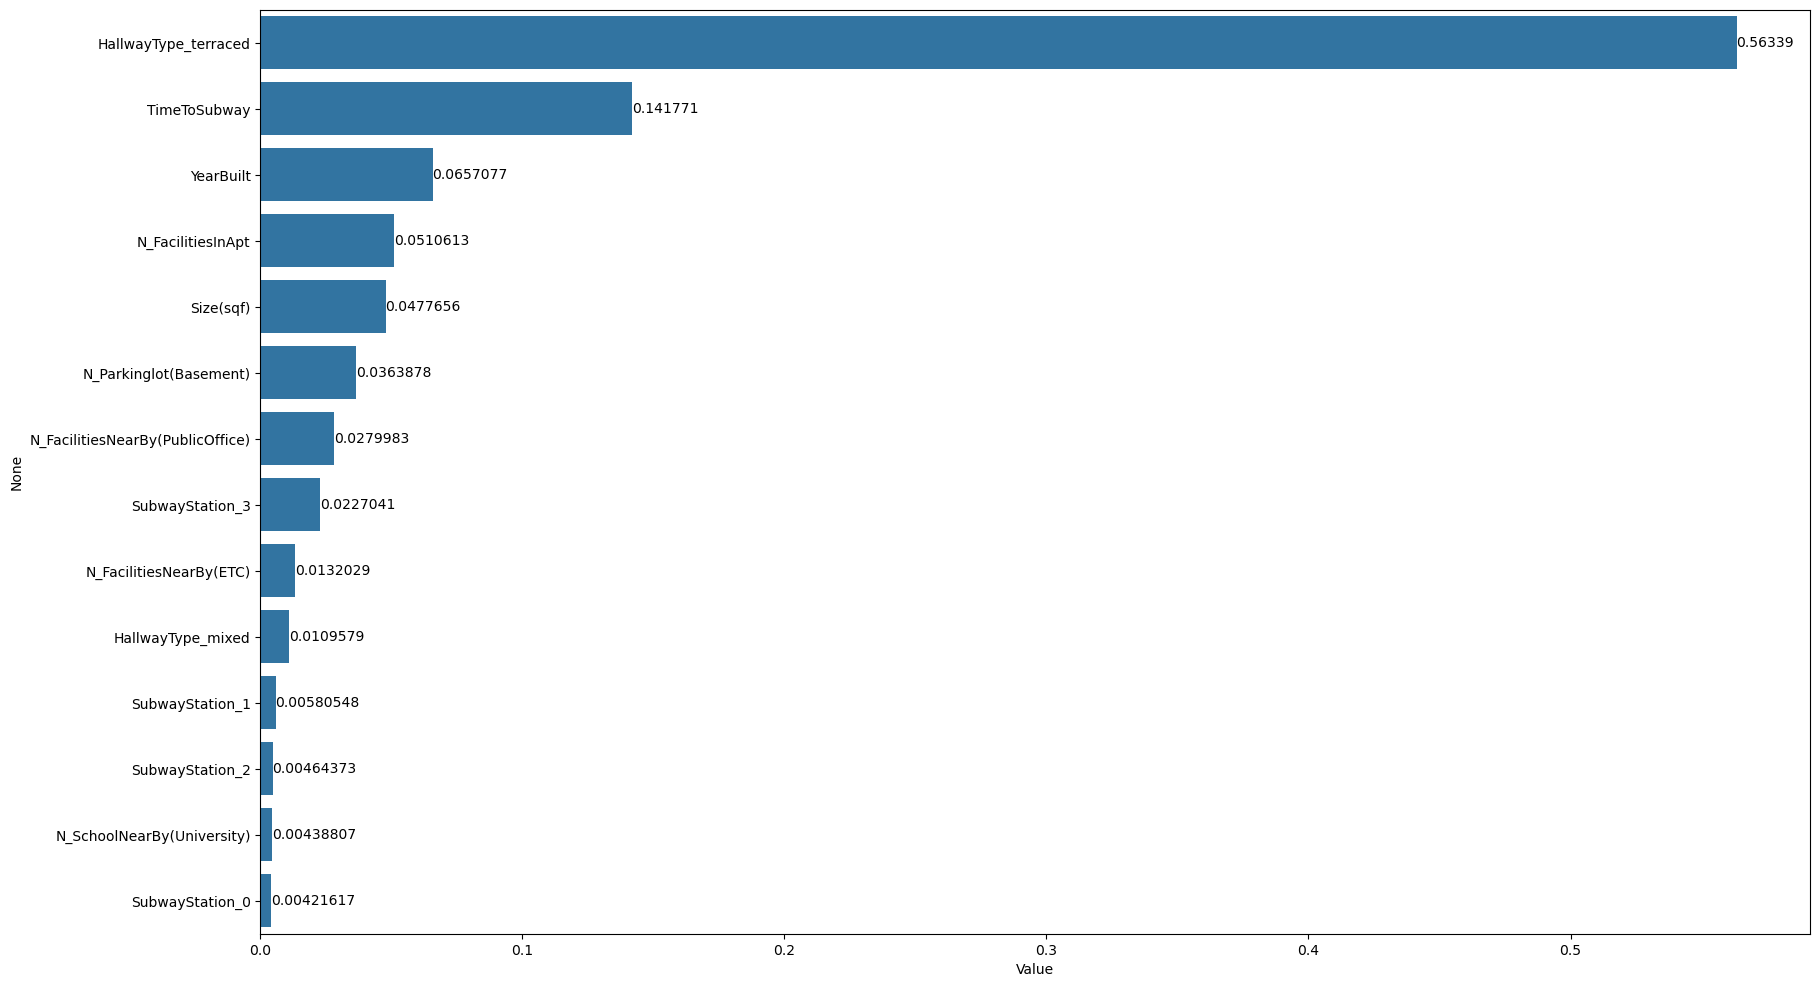

In [78]:
feature_imp = pd.DataFrame(xgb_tuning['model'].feature_importances_, col_names_remove, 
                           columns=['Value']).sort_values(by='Value', ascending=False)

plt.figure(figsize=(20,12))
ax = sns.barplot(data=feature_imp, x='Value', y=feature_imp.index)
for i in ax.containers:
    ax.bar_label(i,)

In machine learning, feature importance refers to how much each feature (or input variable) contributes to making accurate predictions. It helps us understand which features have the most impact on the model’s output.

Based on the Feature Importance with XGBoost above these are the result:
1. `HallwayType_Terraced` is the most important feauture in our model (0.56339). 
2. `TimeToSubway` is the second most important feature with 0.141771
3. `YearBuilt` have the third highest important feature (0.0657077).

In [79]:
df_compare = X_test.copy()
df_compare['SalePrice'] = y_test

df_compare[['HallwayType','TimeToSubway','YearBuilt','SalePrice']].head()

,HallwayType,TimeToSubway,YearBuilt,SalePrice
2927,terraced,0-5min,2007,433778
1427,terraced,0-5min,2006,356637
2081,mixed,5min-10min,2005,201769
352,terraced,0-5min,2007,371681
1861,mixed,15min-20min,1997,119469


In [80]:
# Predicted Price using models
df_compare['Predicted'] = (xgb_tuning.predict(X_test)).round()

# The price difference between the actual price and the predicted price
df_compare['Difference'] = abs(df_compare['Predicted']- df_compare['SalePrice'])

# Difference Percentage
df_compare['Different Percentage Price(%)'] = (((df_compare['Difference'] / df_compare['SalePrice']) * 100))

#Actual price, predicted price, price difference, and Difference Percentage
df_compare[['HallwayType', 'TimeToSubway', 'YearBuilt', 'SalePrice', 'Predicted', 'Difference', 'Different Percentage Price(%)']].head()


,HallwayType,TimeToSubway,YearBuilt,SalePrice,Predicted,Difference,Different Percentage Price(%)
2927,terraced,0-5min,2007,433778,405694.0,28084.0,6.474279
1427,terraced,0-5min,2006,356637,286658.0,69979.0,19.621912
2081,mixed,5min-10min,2005,201769,210085.0,8316.0,4.121545
352,terraced,0-5min,2007,371681,283921.0,87760.0,23.611645
1861,mixed,15min-20min,1997,119469,139202.0,19733.0,16.517256


In [81]:
df_compare['Different Percentage Price(%)'].describe()

count    676.000000
mean      19.413633
std       15.101833
min        0.000771
25%        7.317091
50%       17.309554
75%       27.563663
max      100.595106
Name: Different Percentage Price(%), dtype: float64

<Axes: xlabel='Different Percentage Price(%)', ylabel='Count'>

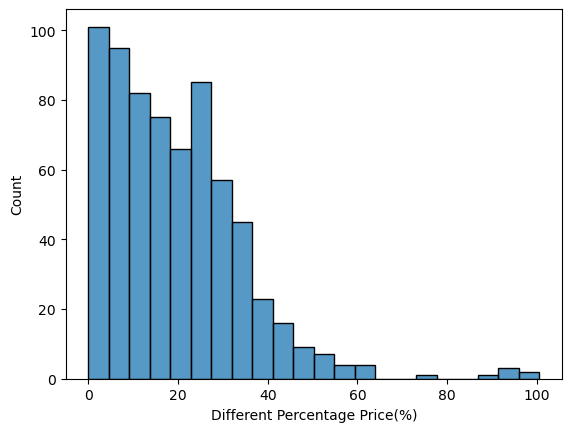

In [159]:
sns.histplot(df_compare['Different Percentage Price(%)'])

Text(0.5, 0, 'Predict percentage Error (%)')

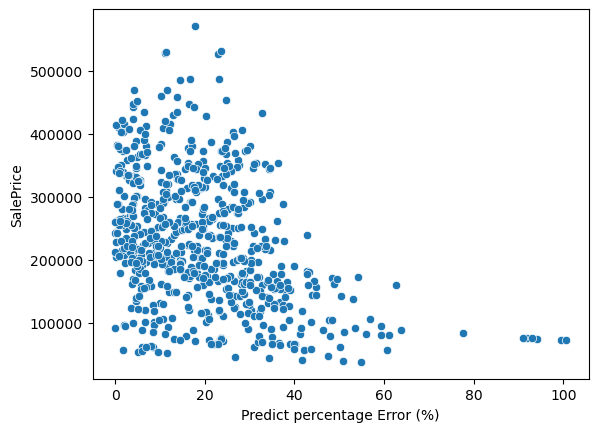

In [160]:
sns.scatterplot(data= df_compare, y='SalePrice',x='Different Percentage Price(%)')
plt.xlabel('Predict percentage Error (%)')

as on the scatterplot above, we can see that the low the sale price, the higher potential for errors. 

In [163]:
df_compare[(df_compare['Different Percentage Price(%)']>60) & (df_compare['Different Percentage Price(%)']<70)].sort_values('Different Percentage Price(%)',ascending=True)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,Predicted,Difference,Different Percentage Price(%)
552,corridor,10min-15min,Myung-duk,5,7,5,0,1992,3,576,57079,91663.0,34584.0,60.589709
1131,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,644,79646,128322.0,48676.0,61.115436
2991,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,868,159292,259290.0,99998.0,62.776536
3412,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,572,88495,144942.0,56447.0,63.785525


In [165]:
len(df_compare[df_compare['Different Percentage Price(%)']<30])/len(df_compare)

0.7973372781065089

The fact that there is a large variety of various SalePrice values when we check the error from 60% to 70% suggests that the errors by themselves are unable to adequately explain the variability in SalePrice. The range of Predict / SalePrice values is influenced by other parameters (Feature Importance), and the errors do not accurately reflect the magnitude of SalePrice.
Example:
Predict price : 259290, while the actual price : 159292.	
The difference up to 99998. This difference is quite large, but if we look at the another features, the apartment area is quite large, namely 868 and the parking capacity is also large (1270), this may not be too detrimental with the features that support the price. Apart from that, if the difference between the predicted and actual prices is large enough, this could be an advantage for the Property Agent himself who will get a large commission.

## 5. CONCLUSION & RECOMMENDATIONS

### 5.1. Conclusion

Here the sum:

1. The best model obtained in the modeling process for the data_daegu_apartment dataset which can be used to predict apartment sale prices is the *XGBoost* model.

2. Based on the modeling that has been done, the features HallwayType_Terraced(0.56339), TimeToSubway(0.141771), and YearBuilt (0.0657077) are the most influential features on SalePrice. However, it does not mean that other features do not have an impact on the target variable.

3. The evaluation metric used for the model is MAE (Mean Absolute Error). Looking at the MAE value produced by the model after hyperparameter tuning using XGBoost, which is 38674.226031, we can conclude that if this model is used to estimate apartment prices in Daegu within the range of values it was trained on (max_price:585840), the estimated error, as indicated by MAE, is relatively small. However, when compared to the model trained on min_price:32743, the error is significantly large.

4. However, apartment price predictions can also miss the actual apartment price due to bias that may occur due to the limited features used so that the features in the dataset do not adequately represent the factors that influence apartment prices in Daegu, South Korea.

Overall, using the XGBoost model that has undergone the tuning process as the most accurate model for predicting apartment prices in Daegu. This model can provide price estimations with a lower level of error, making it a more reliable tool in supporting business decisions related to determining apartment prices. By relying on this tuned XGBoost model, businesses can make more accurate price estimations and optimize pricing strategies. 

### 5.2. Recommendations

The following suggestions can be made to enhance the model's capacity to forecast apartment prices:

1. Include details like the number of apartment levels, rooms, ratio number of cars parked in the apartment complex, and whether or not it is fully furnished. These details enable it to be matched to SalesPrice.

2. Continuously update the model with the latest transaction data to ensure high accuracy.

3. Explore more complex algorithms that can potentially minimize errors deep learning models.

4. Formulate marketing strategies targeting property features that significantly influence the sales price.

Incorporating these conclusions and recommendations, real estate stakeholders in Daegu can leverage the model to refine pricing and sales strategies, thereby enhancing accuracy and minimizing risks associated with price prediction errors.

**SAVE MODEL**

In [87]:
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

# Save the model
pickle.dump(estimator, open('Model_Daegu_XGB.sav', 'wb'))

# Load the model
filename = 'Model_Daegu_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Calculate RMSE
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

48109.51492052686